# Sheet 2

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

In [15]:
A = np.arange(1,10)
A

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
((A-2)/4)**2,A-2

(array([0.0625, 0.    , 0.0625, 0.25  , 0.5625, 1.    , 1.5625, 2.25  ,
        3.0625]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))

In [10]:
A = np.arange(1,11)
np.where(1<A<4)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
def biweight(x, mu, w):

    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    #TODO: implement the quartic (biweight) kernel
    A = 15./(16*w)
    B=  (x-mu)/w
    K_arr = np.zeros(len(x))
    for i in range(len(x)):
        if(-1<=B[i]<=1):
            K_arr[i] = A*(1-(B[i]**2))**2

    return K_arr;


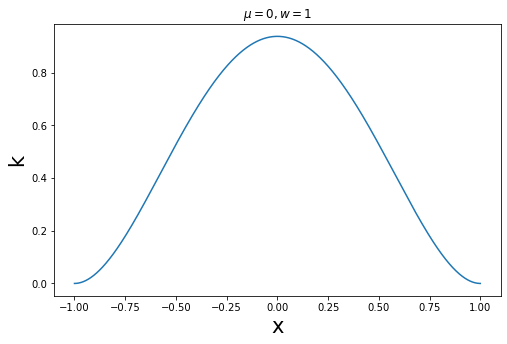

In [21]:

# TODO plot the kernel
x = np.linspace(-1,1,1000)

kernel = biweight(x1,0,1)
plt.figure(figsize = (8,5))
plt.title(r'$\mu = 0,w = 1$')
plt.plot(x,kernel)
plt.xlabel('x',fontsize = 21)
plt.ylabel('k',fontsize = 21)

plt.show()



### Plotting Kernel for the given data and various values for $w$ and $N$

(b)

data.shape=(10000,), data50.shape=(50,)


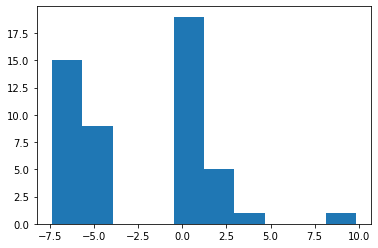

In [22]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')
plt.hist(data50)
plt.show()


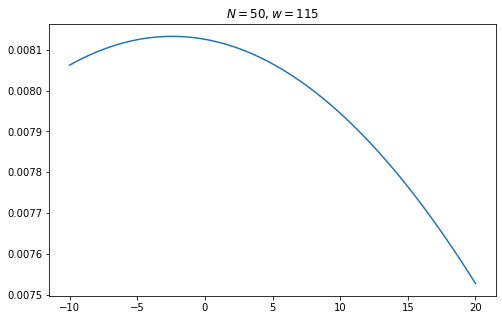

In [25]:
X = np.linspace(-10,20,100)   ##defining the new range
def kde(x1, obs, w1):
    # TODO: implement the KDE with the biweight kernel

    N = int(len(obs))  ##numbers of sampled data
    estimator  = 0 ##initializing estimator with zero value
    for i in obs:
        estimator += biweight(x1,i,w1)/float(N)
    
    return estimator


bandwidth_array = np.array([115])

for j in bandwidth_array:
    K  = kde(X,data,j)
    plt.figure(figsize = (8,5))
    plt.title(r'$N = 50,w = $'+str(j))

    plt.plot(X,K)
    plt.show()



Let's plot the KDE for different numbers of samples ie for N = [100,1000,5000,10000] for the same bandwidth_array from last excercise

### <center>N = 100 </center>

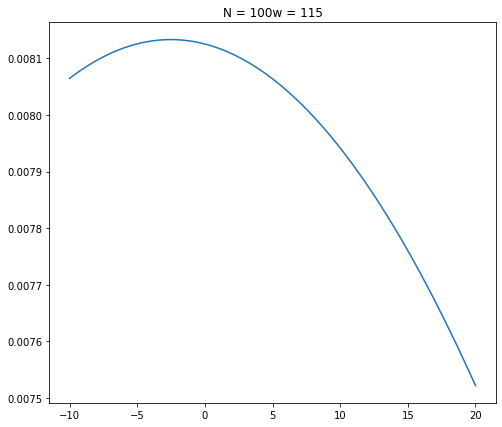

In [24]:

N = 100
data_N = data[:N]

X = np.linspace(-10,20,1000)   ##defining the new range
def kde(x, obs, w):
    # TODO: implement the KDE with the biweight kernel

    N = int(len(obs))  ##numbers of sampled data
    estimator  = 0 ##initializing estimator with zero value
    for i in obs:
        estimator += biweight(X,i,w)
    estimator  = estimator/(N)    
    return estimator



for j in bandwidth_array:
    K  = kde(X,data_N,j)
    plt.figure(figsize = (8,7))
    plt.title("N = " +str(N)+"w = "+str(j))

    plt.plot(X,K)
    plt.show()



### <center>N = 1000 </center>


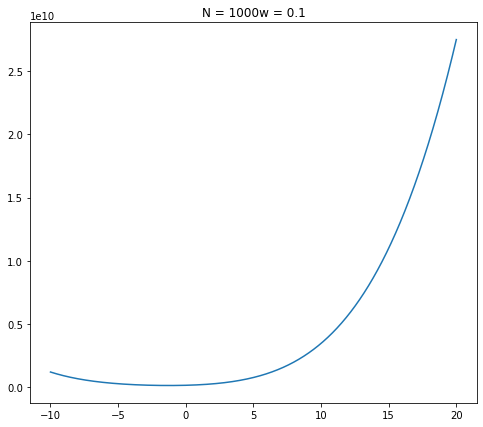

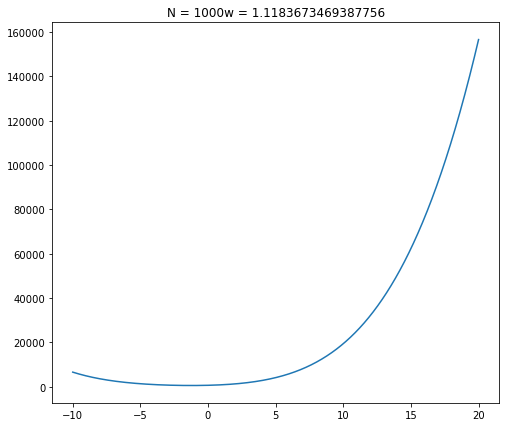

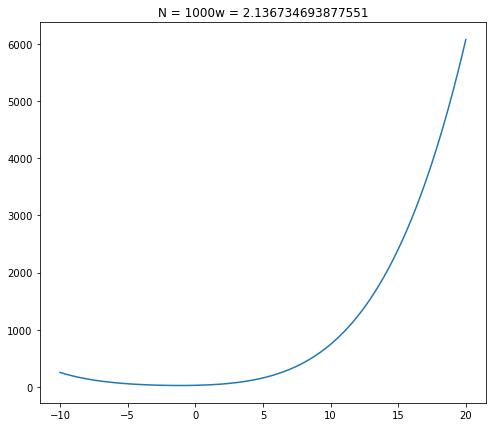

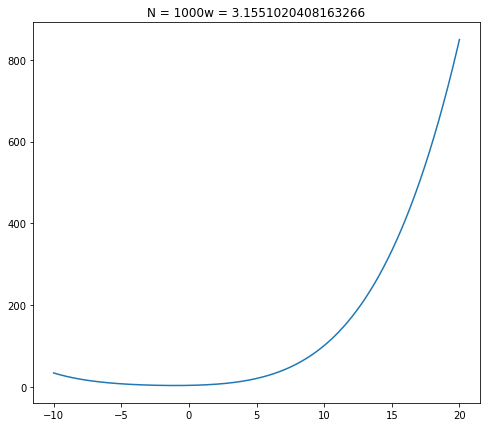

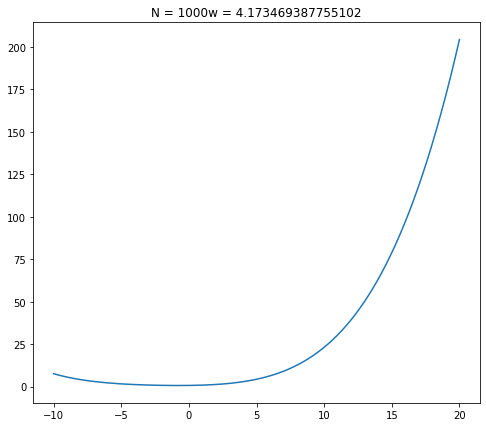

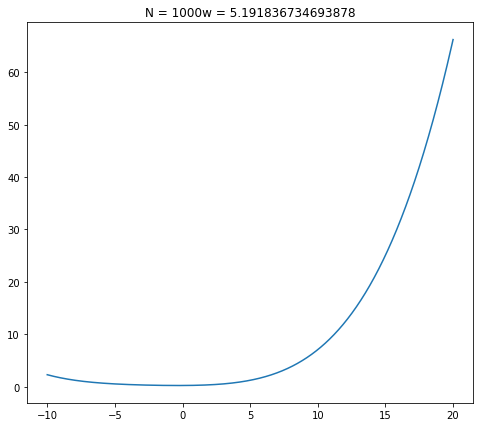

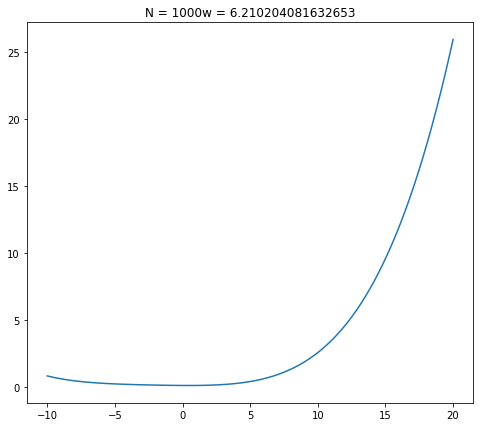

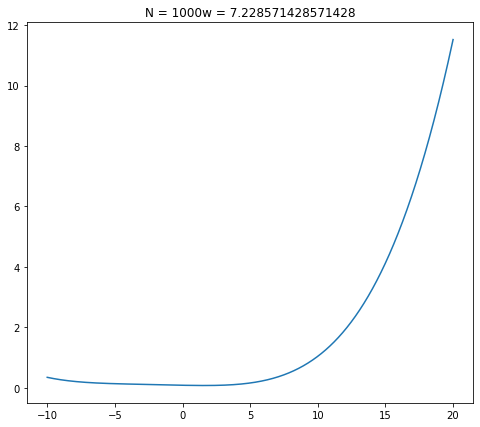

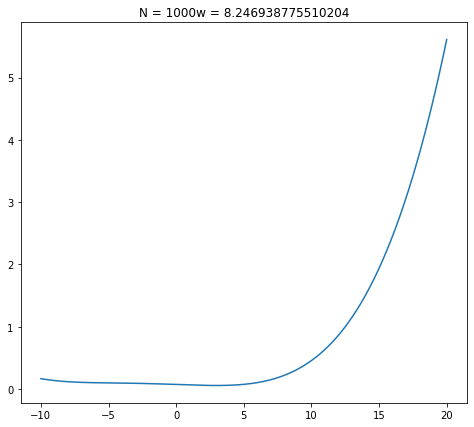

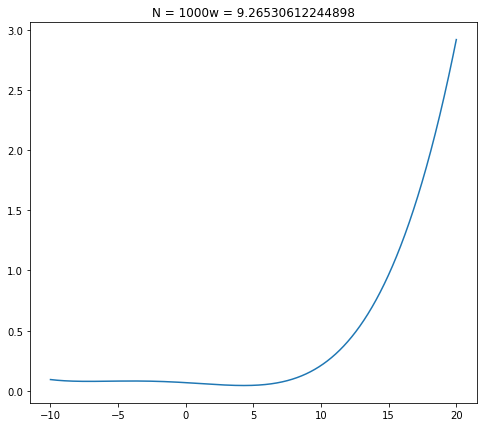

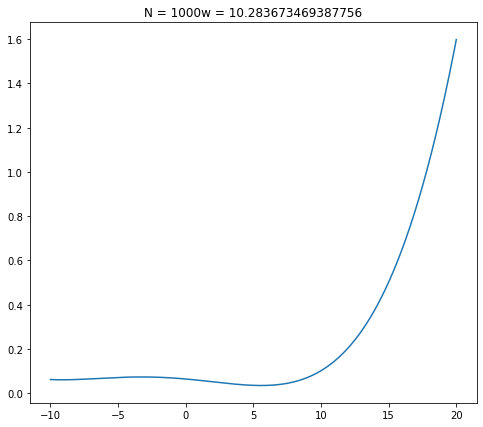

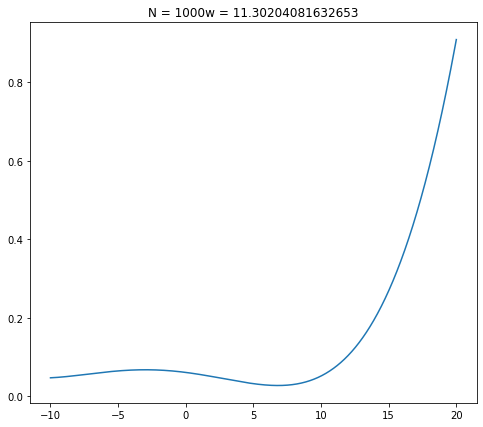

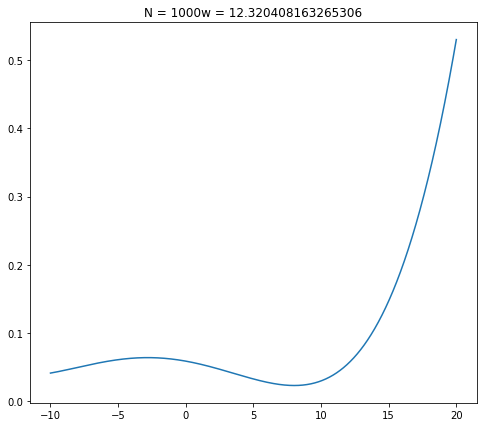

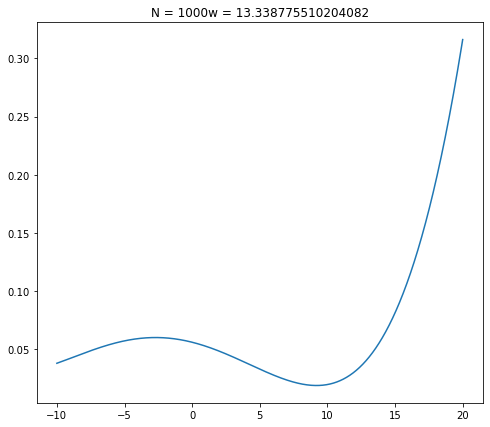

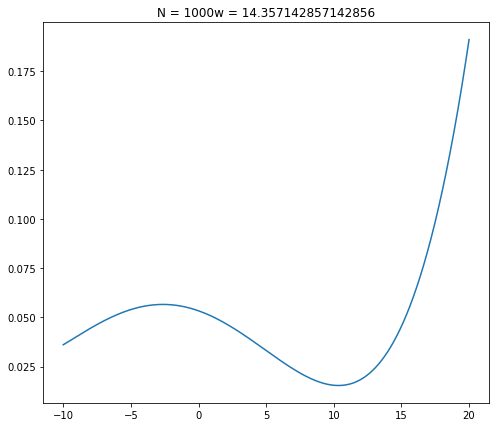

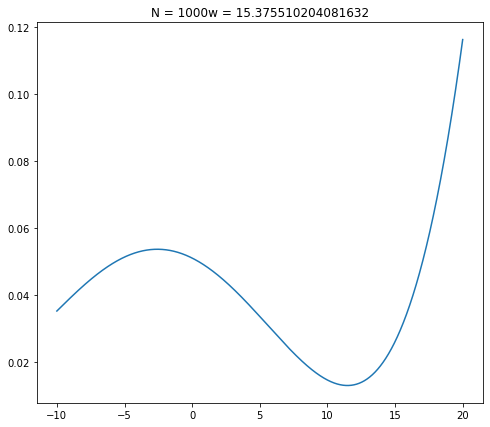

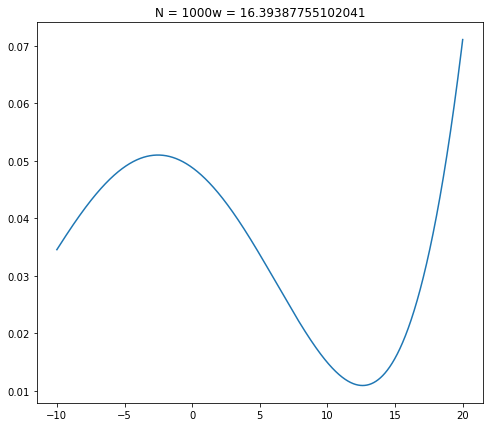

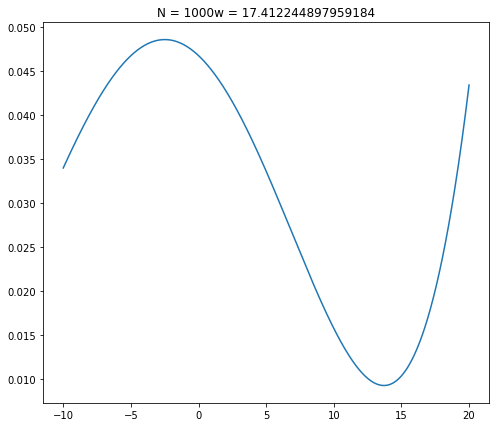

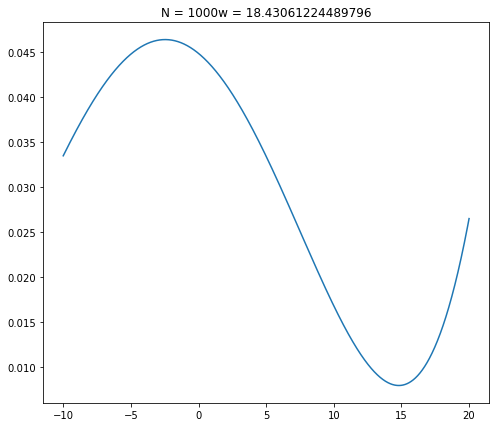

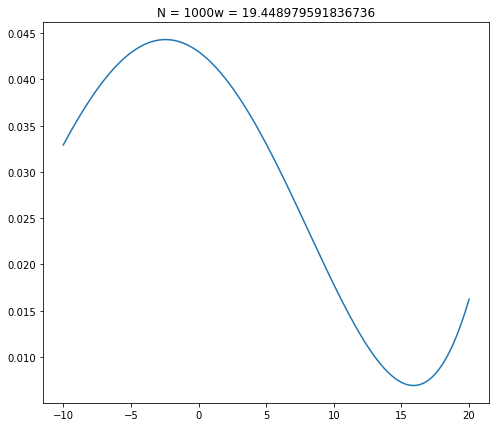

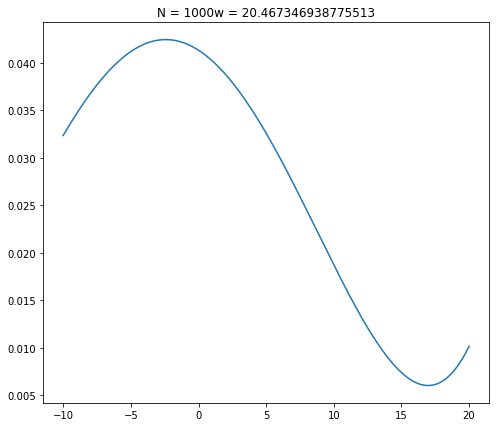

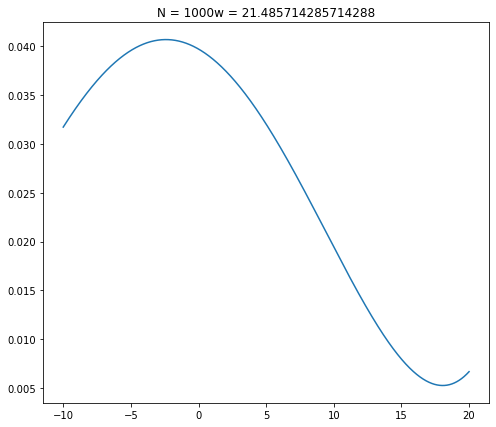

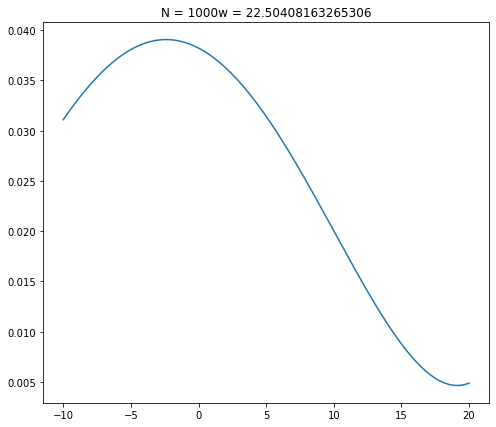

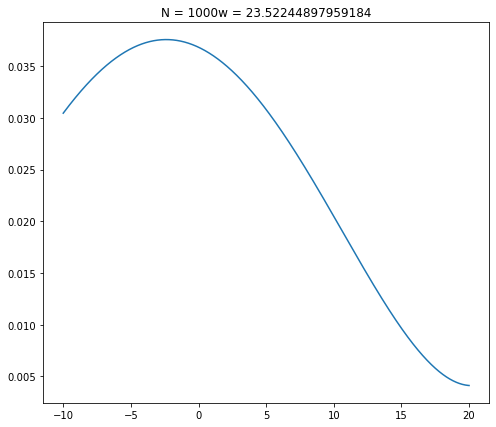

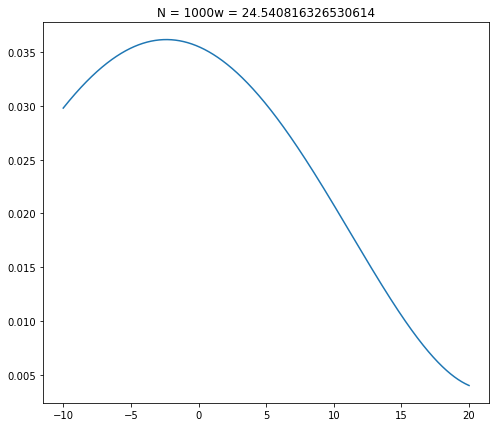

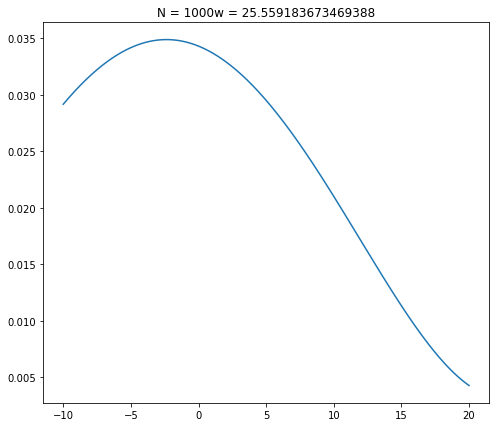

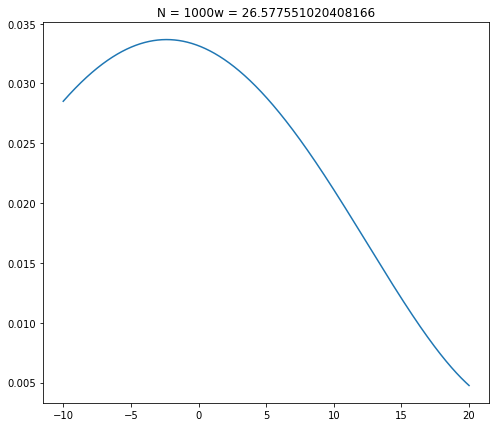

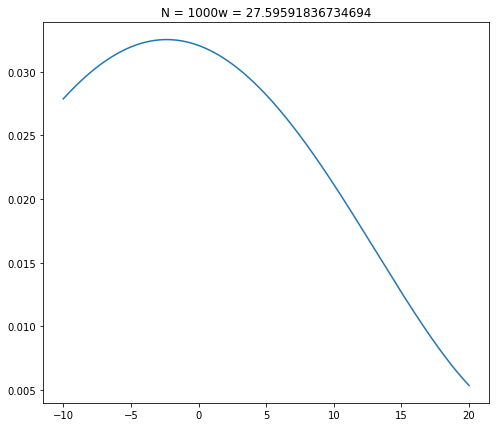

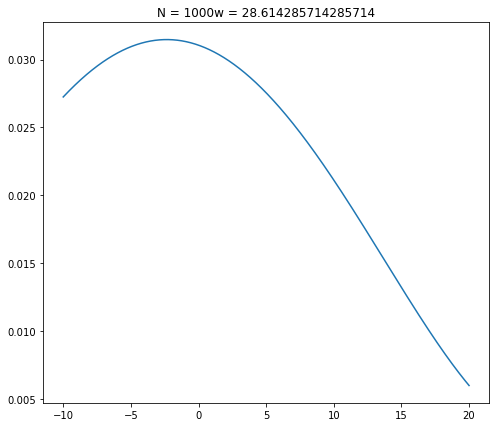

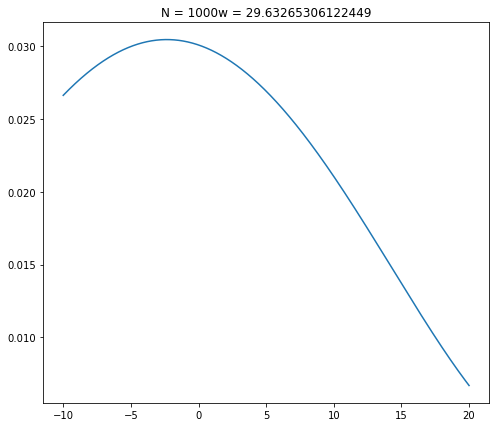

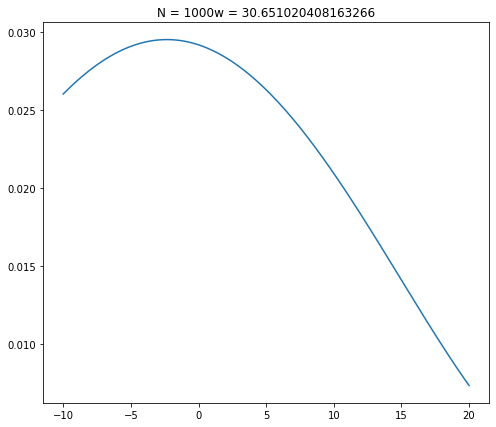

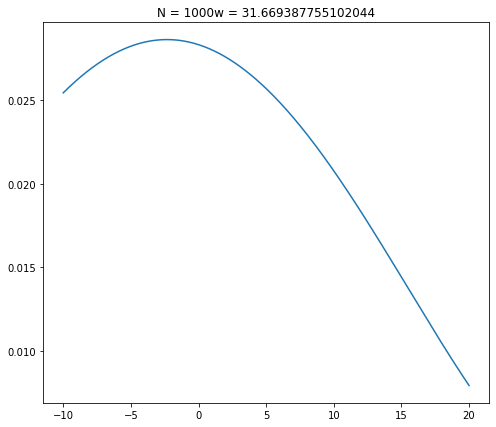

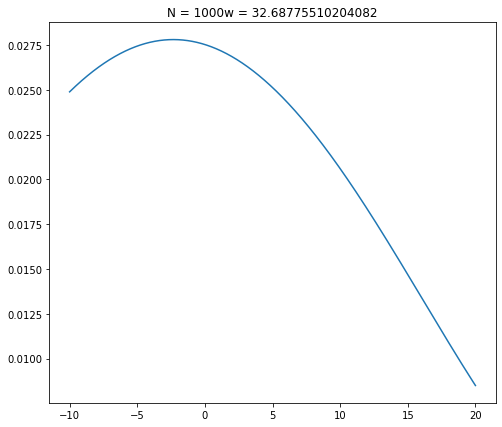

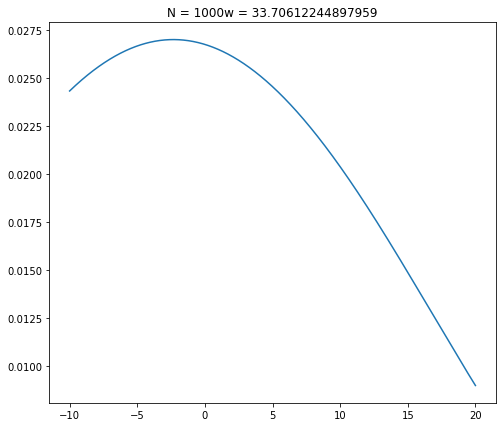

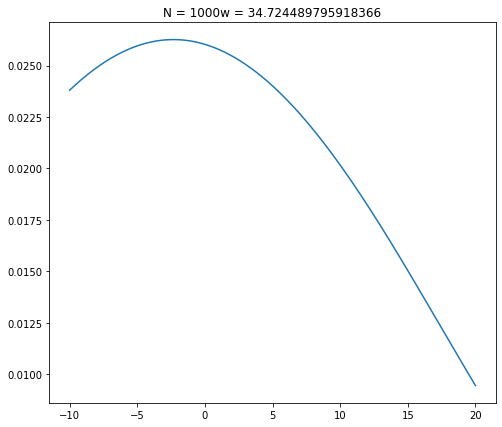

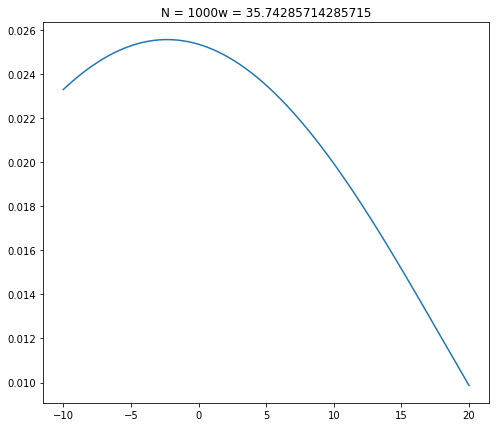

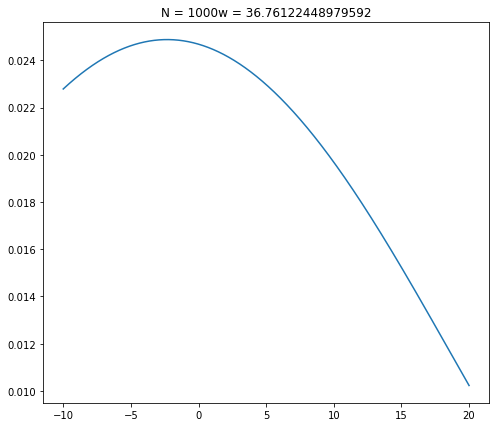

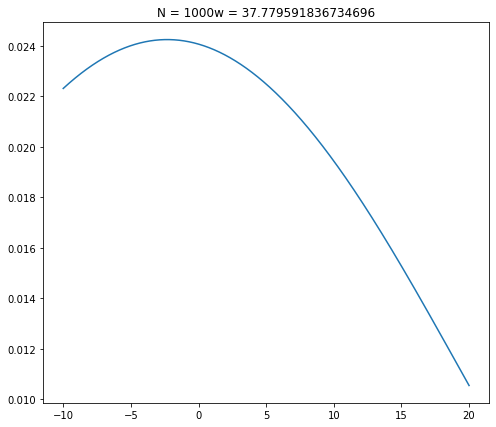

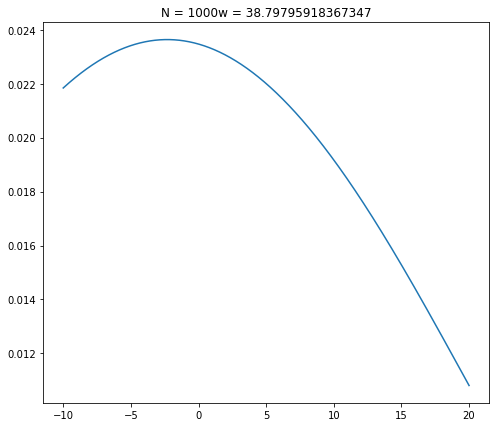

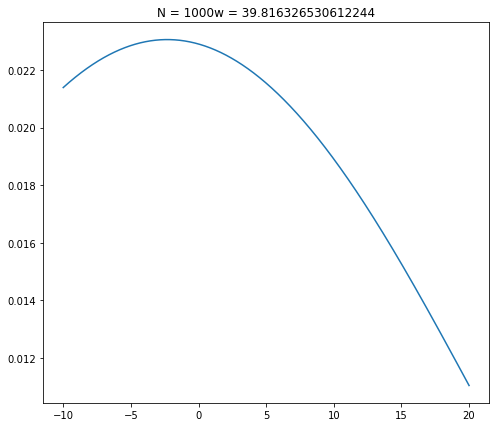

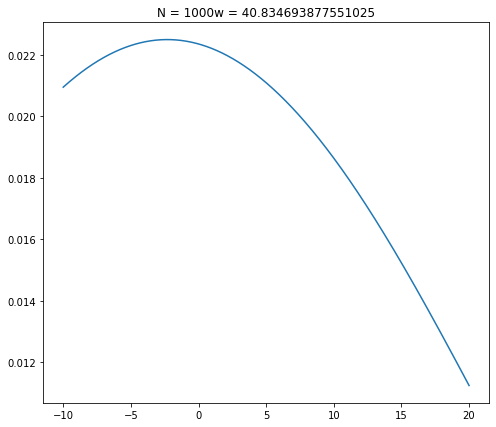

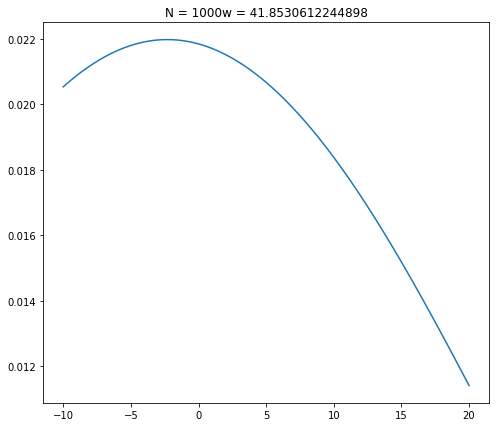

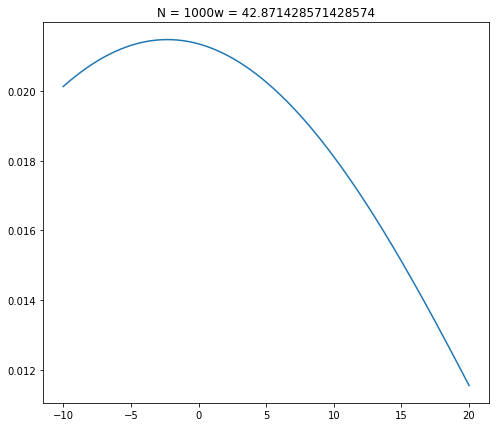

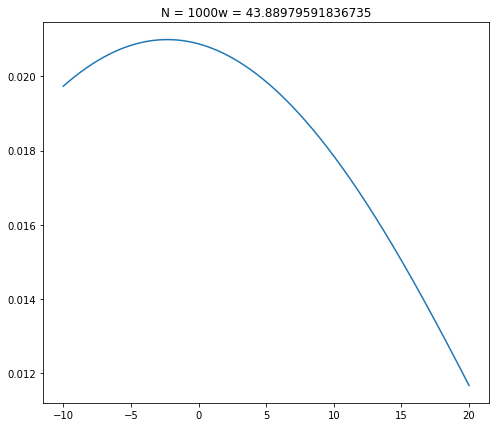

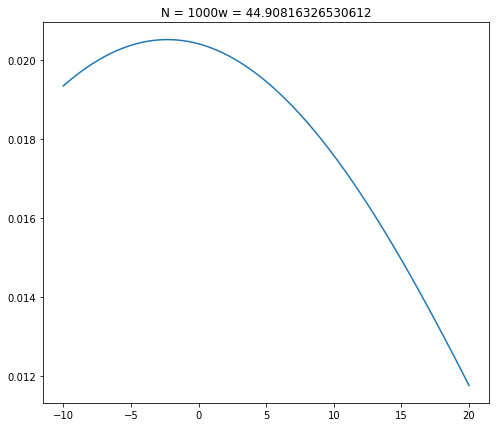

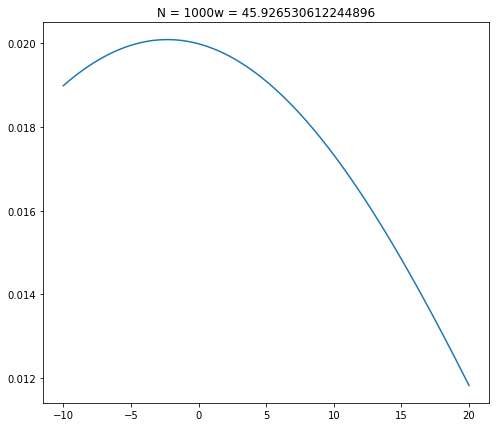

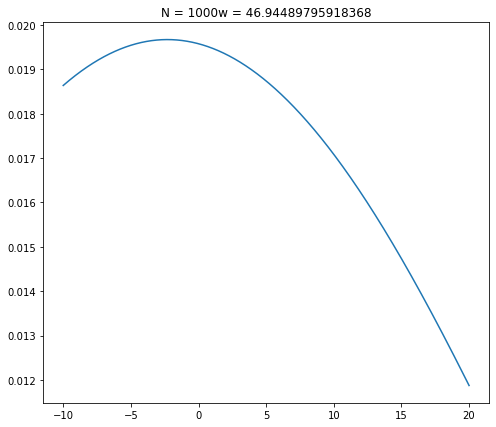

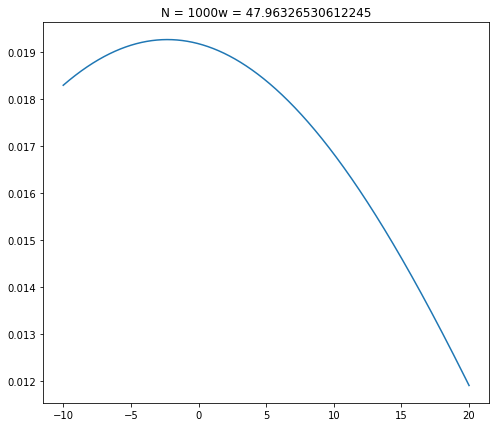

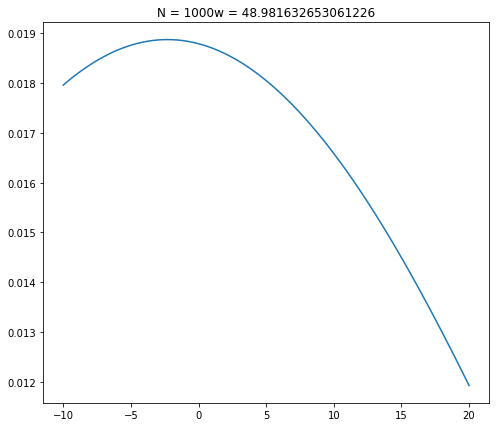

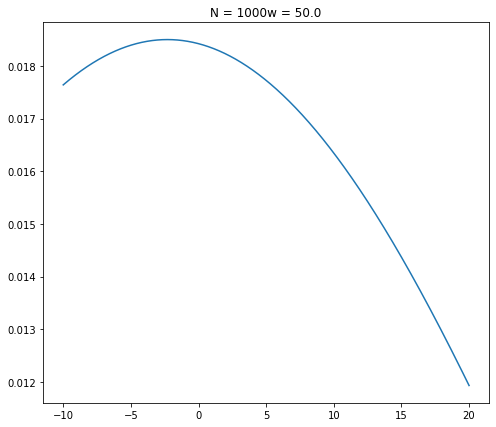

In [11]:

N = 1000
data_N = data[:N]

X = np.linspace(-10,20,2000)   ##defining the new range
def kde(x, obs, w):
    # TODO: implement the KDE with the biweight kernel

    N = int(len(obs))  ##numbers of sampled data
    estimator  = 0 ##initializing estimator with zero value
    for i in obs:
        estimator += biweight(X,i,w)
    estimator  = estimator/(N)    
    return estimator



for j in bandwidth_array:
    K  = kde(X,data_N,j)
    plt.figure(figsize = (8,7))
    plt.title("N = " +str(N)+"w = "+str(j))

    plt.plot(X,K)
    plt.show()



### <center>N = 5000 </center>


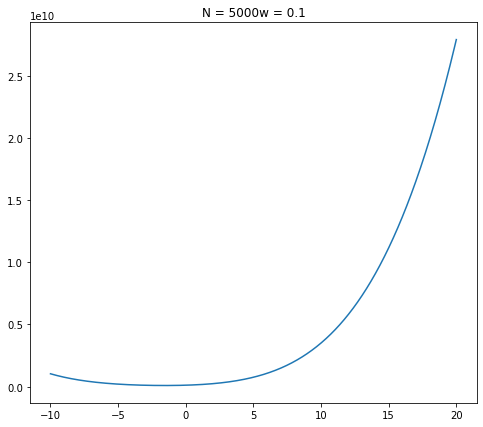

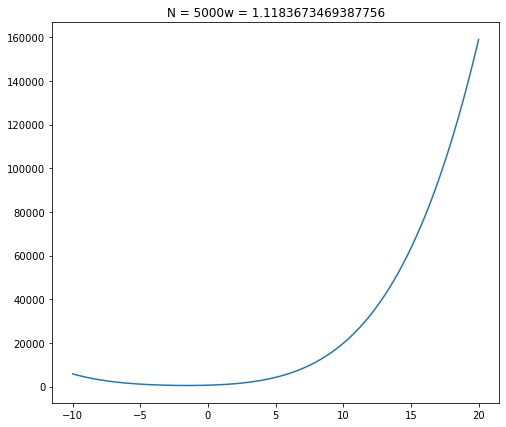

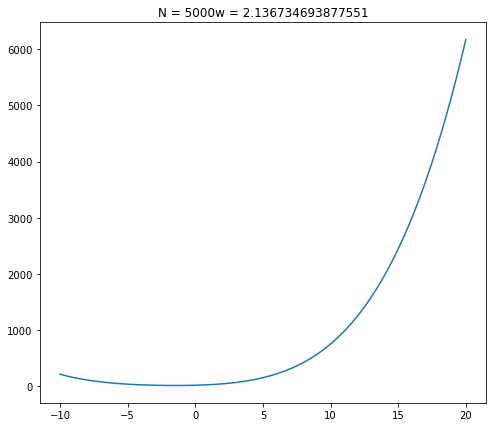

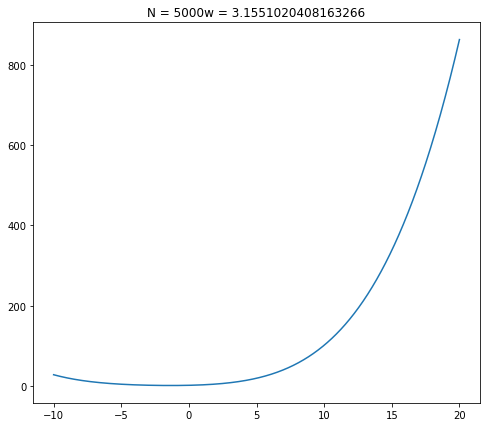

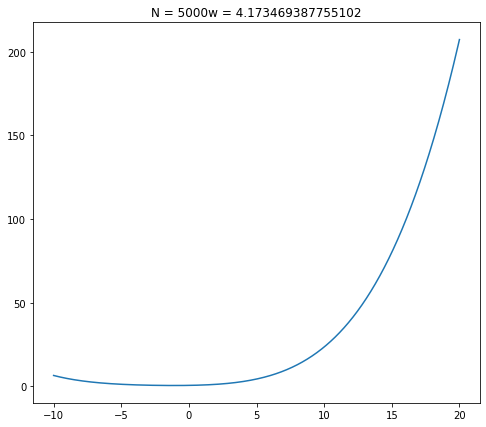

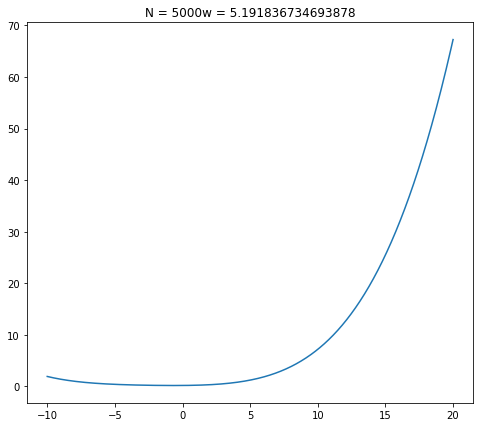

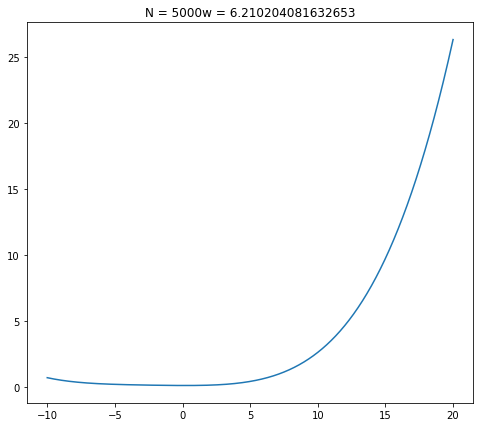

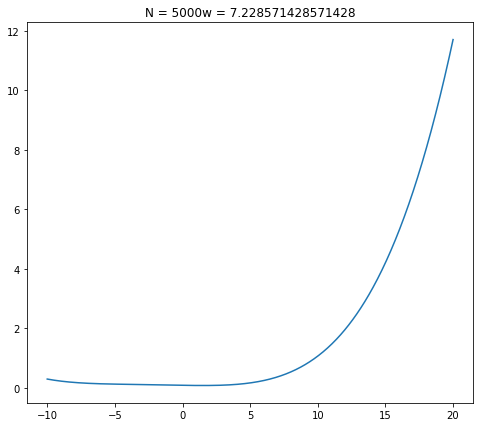

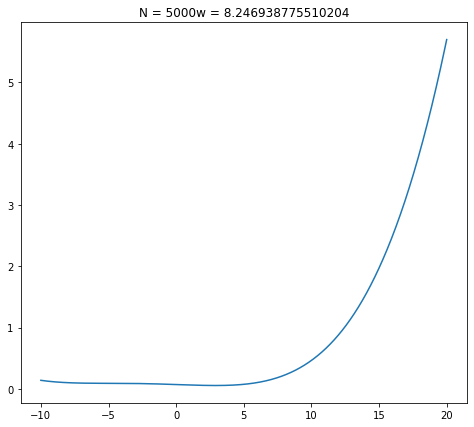

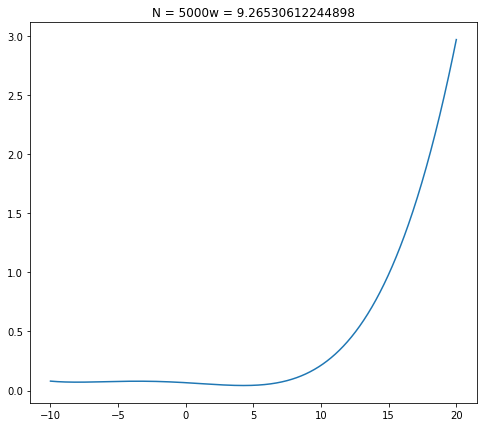

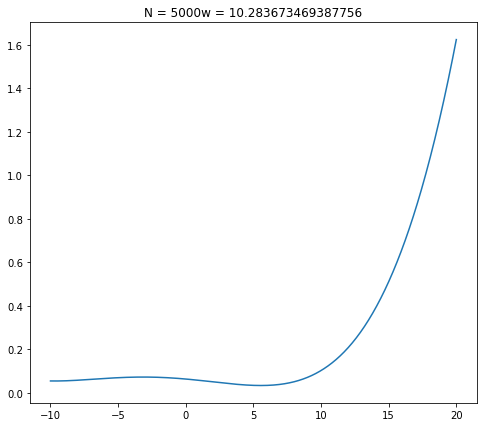

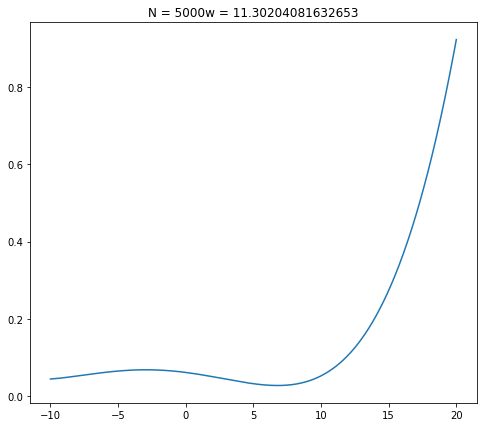

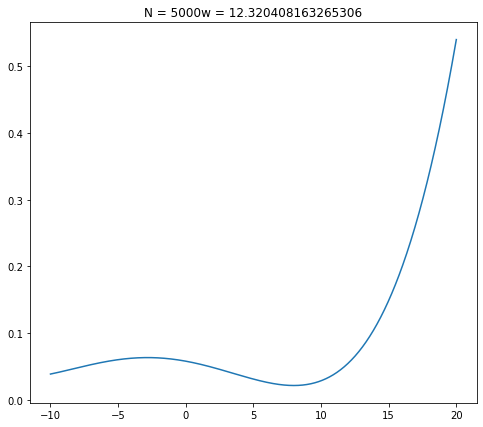

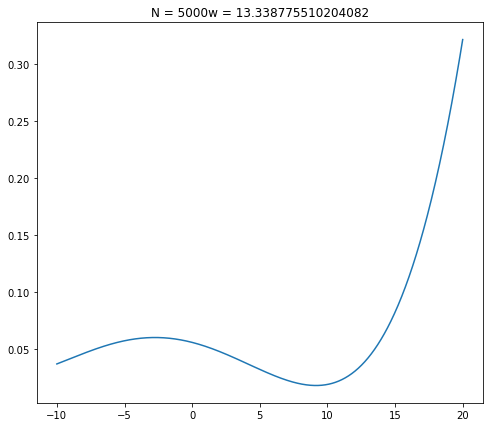

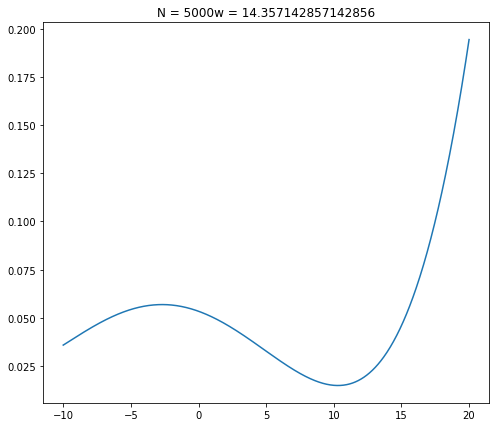

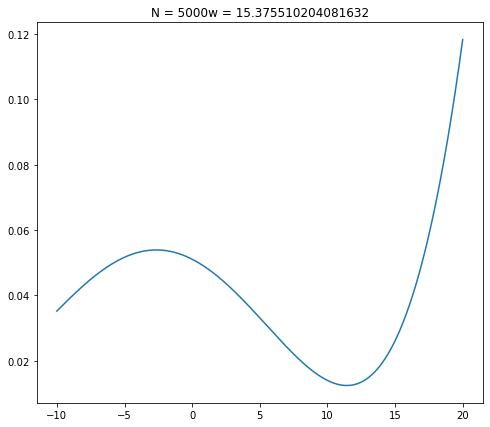

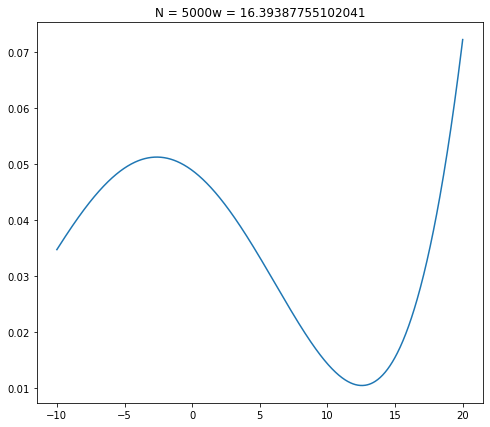

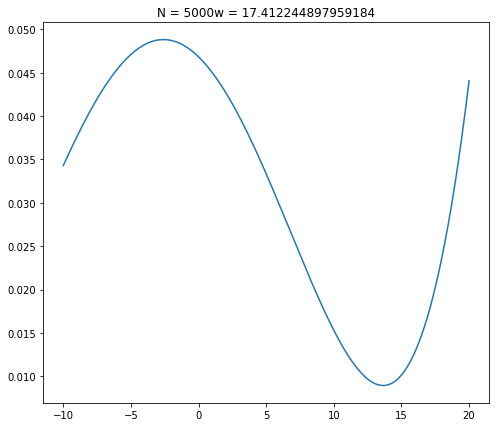

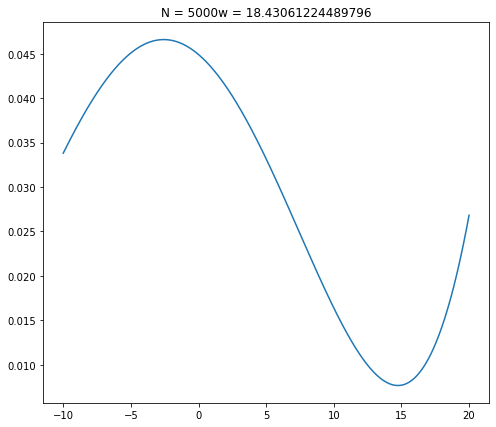

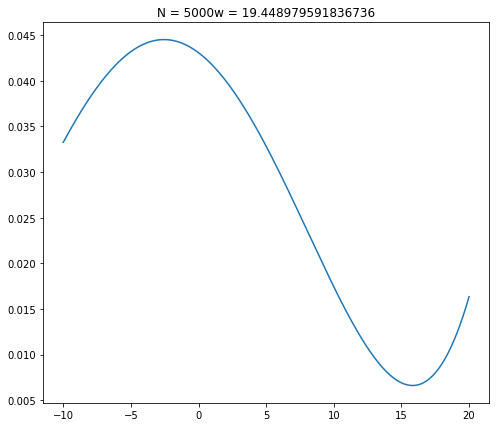

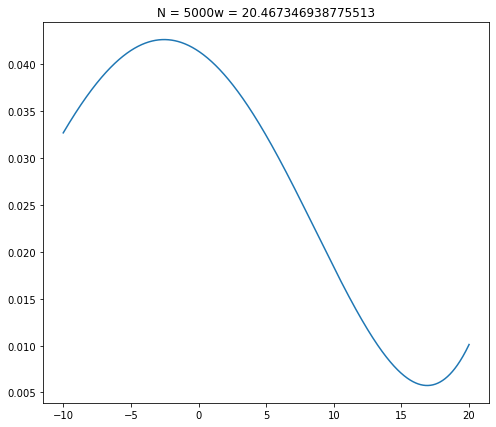

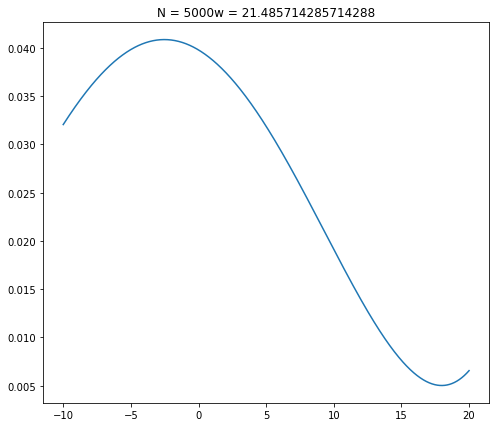

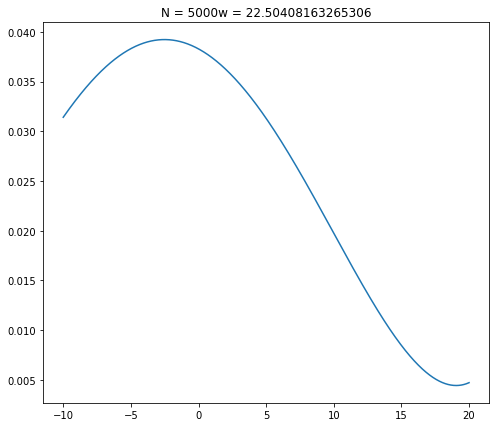

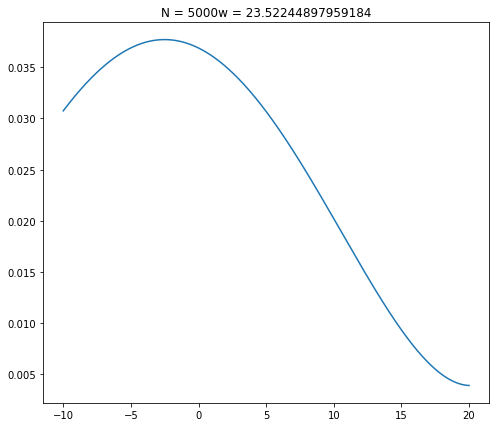

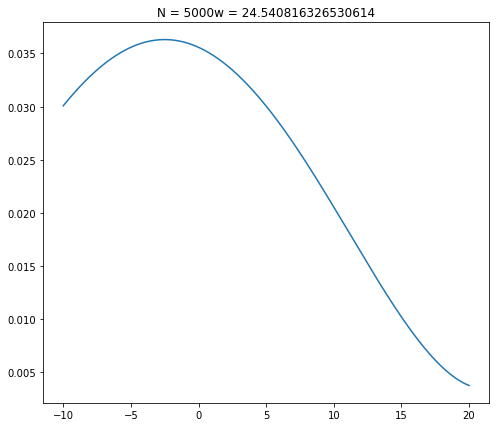

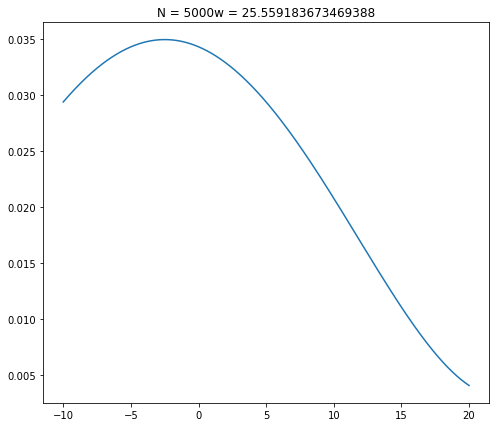

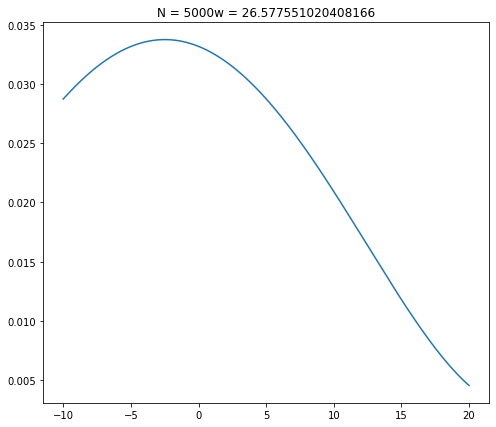

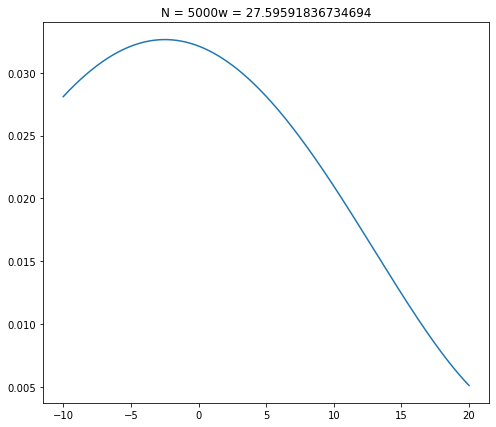

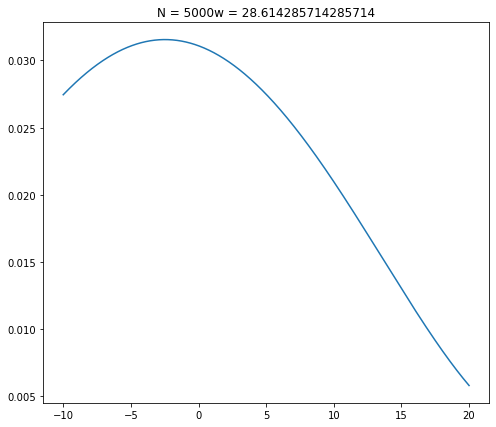

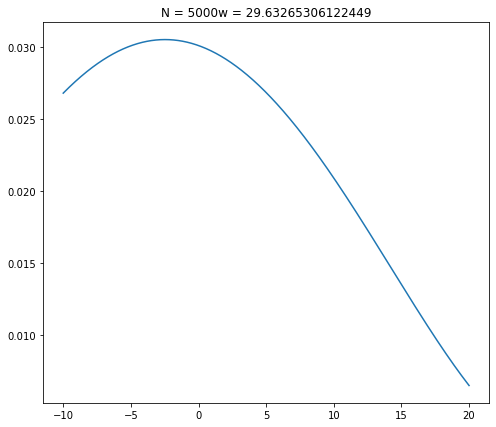

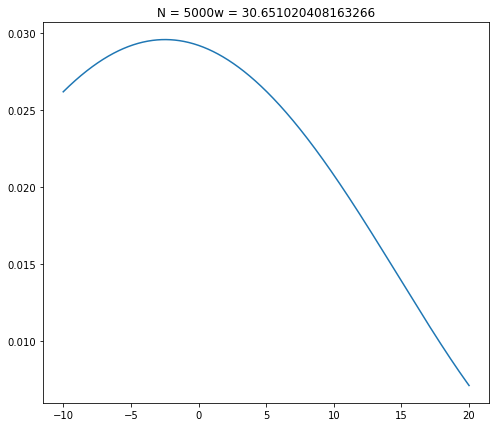

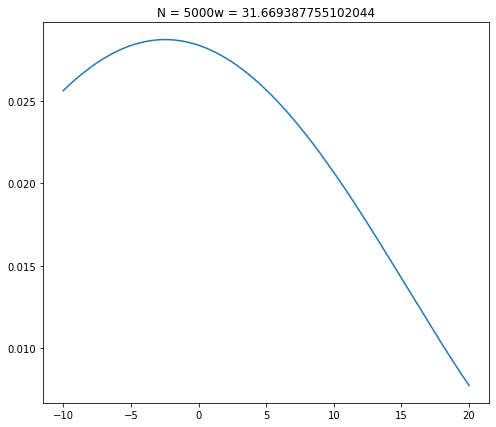

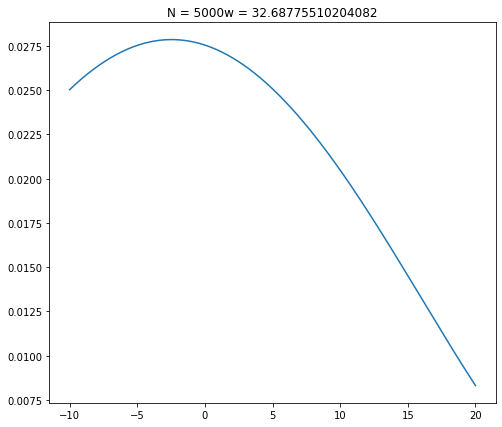

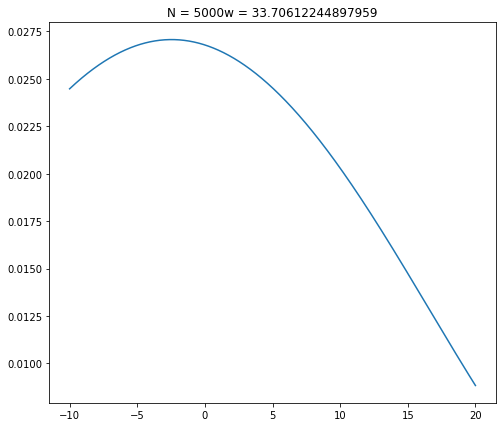

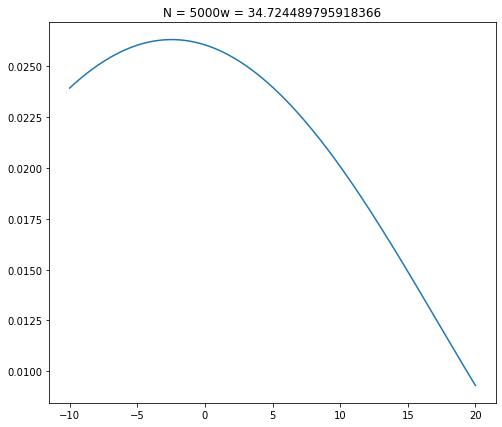

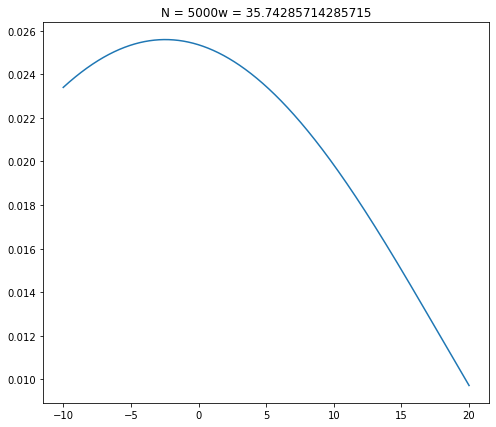

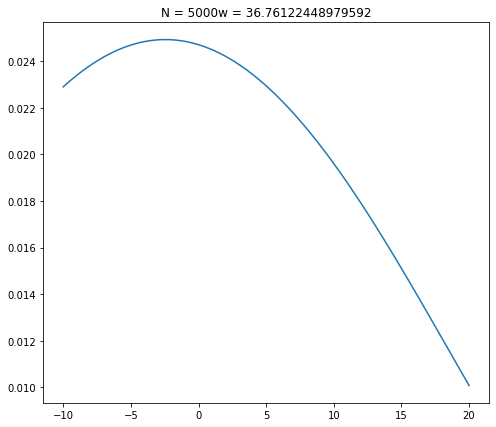

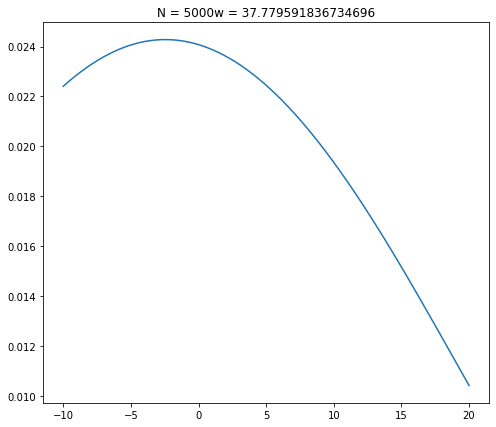

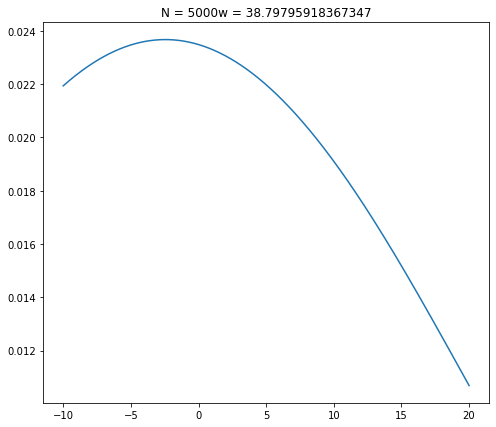

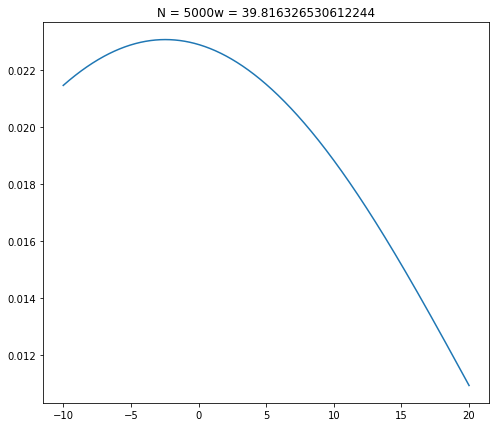

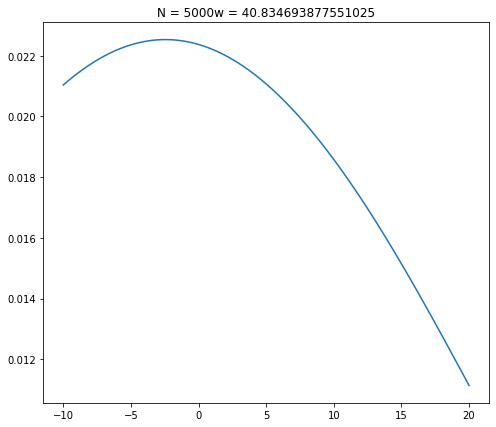

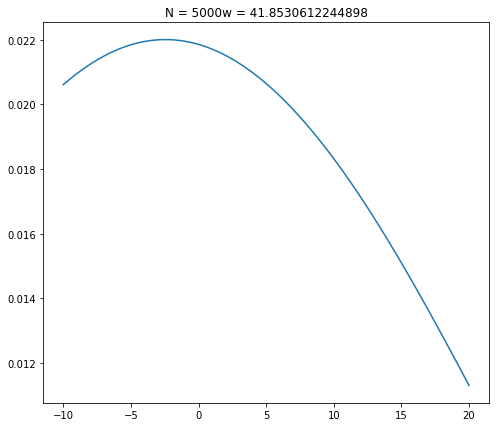

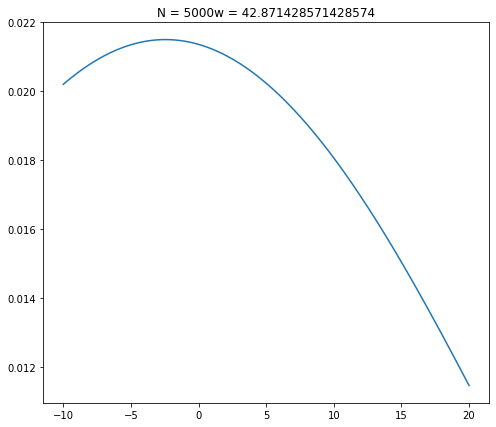

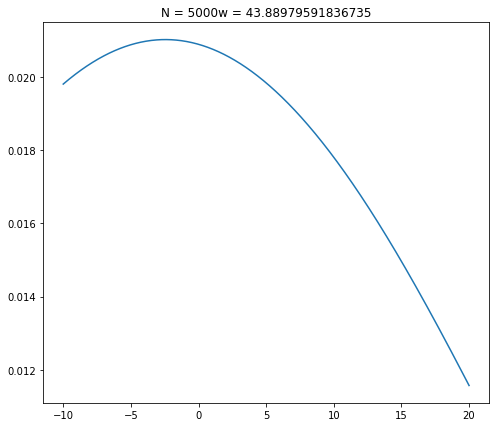

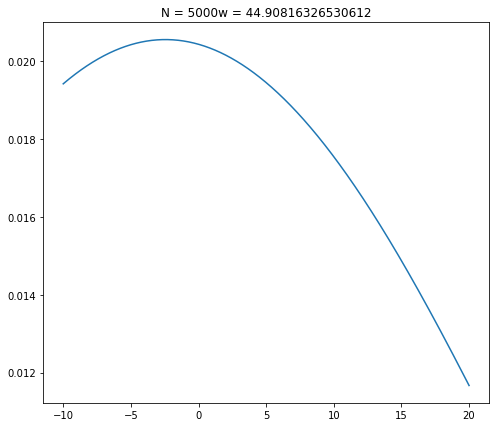

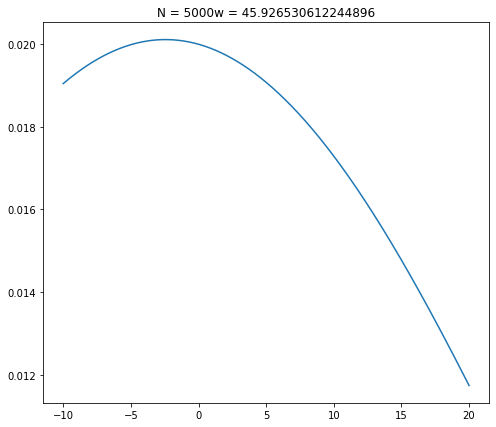

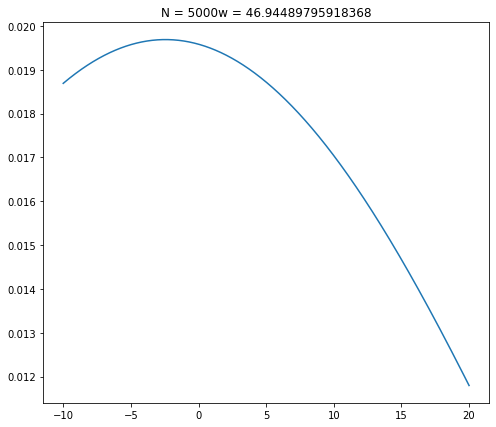

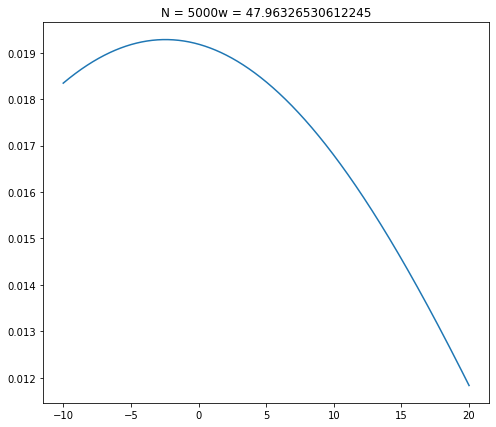

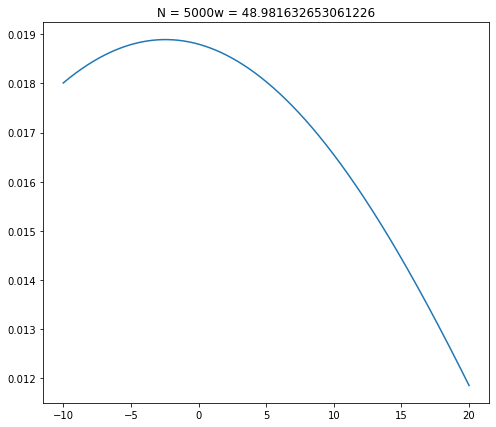

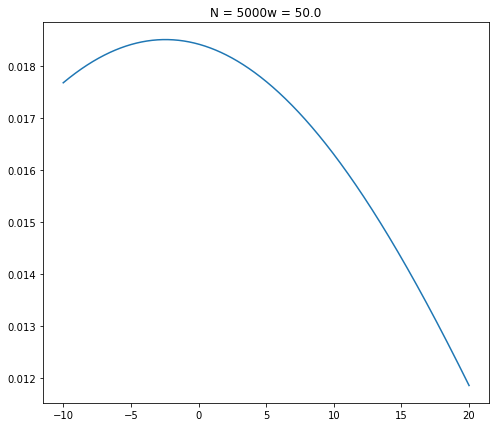

In [12]:

N = 5000
data_N = data[:N]

X = np.linspace(-10,20,1000)   ##defining the new range
def kde(x, obs, w):
    # TODO: implement the KDE with the biweight kernel

    N = int(len(obs))  ##numbers of sampled data
    estimator  = 0 ##initializing estimator with zero value
    for i in obs:
        estimator += biweight(X,i,w)
    estimator  = estimator/(N)    
    return estimator



for j in bandwidth_array:
    K  = kde(X,data_N,j)
    plt.figure(figsize = (8,7))
    plt.title("N = " +str(N)+"w = "+str(j))

    plt.plot(X,K)
    plt.show()



### <center>N = 10000 </center>


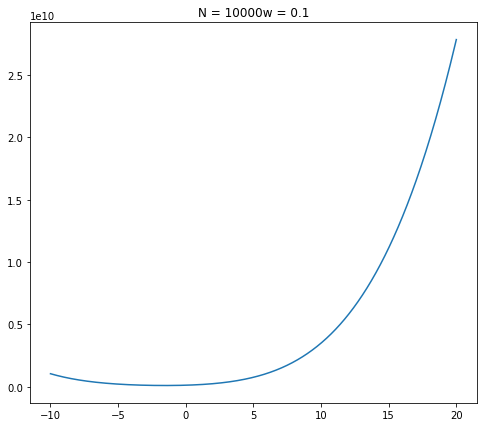

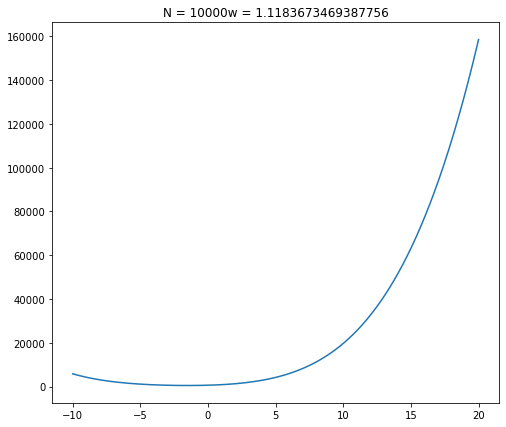

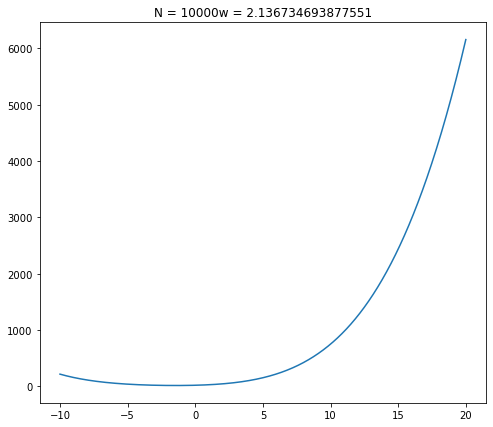

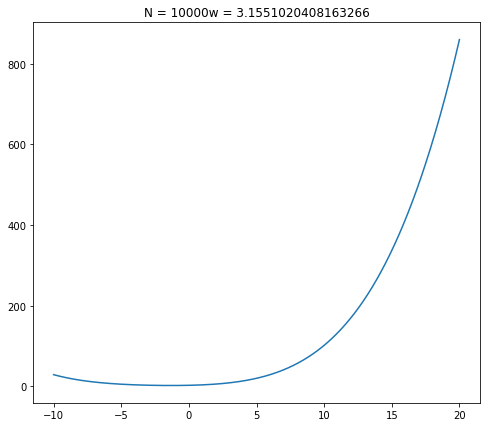

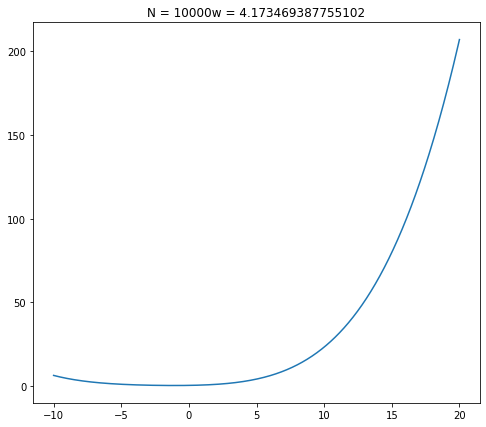

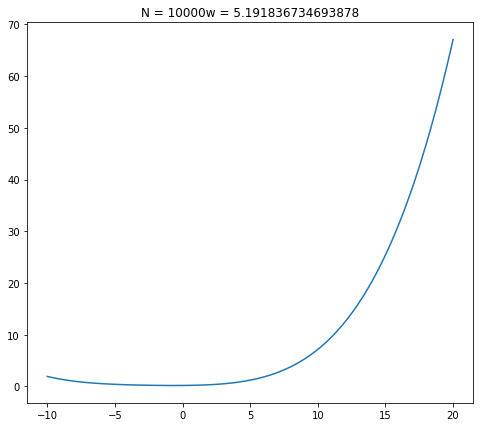

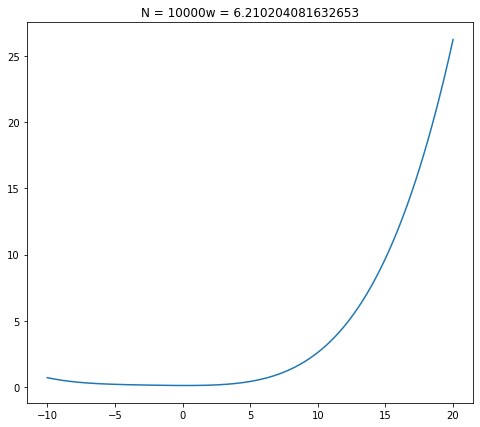

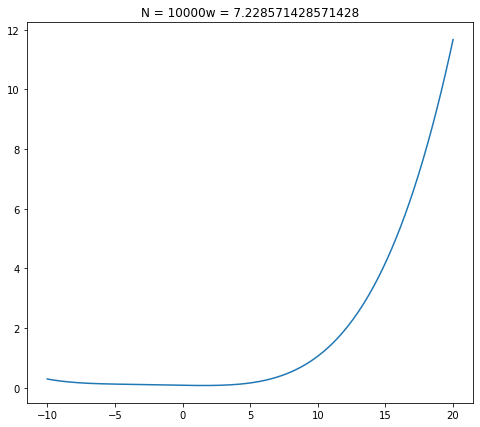

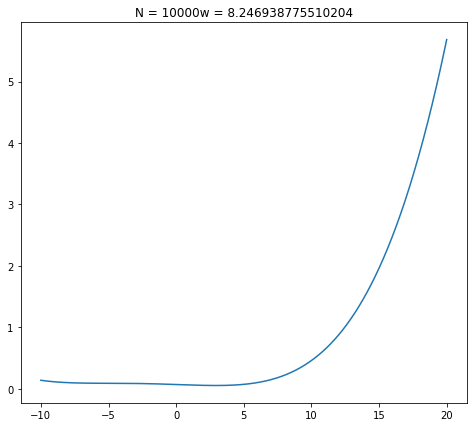

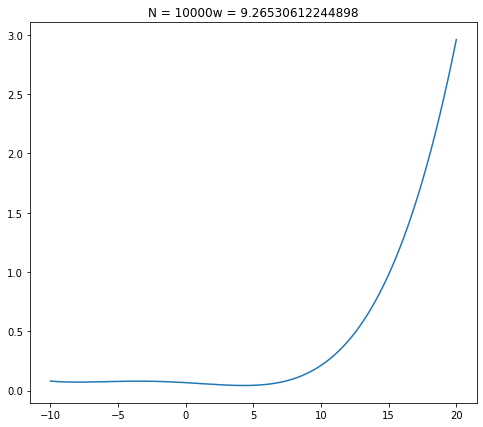

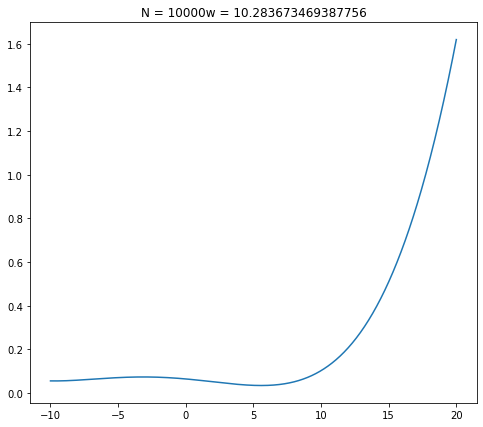

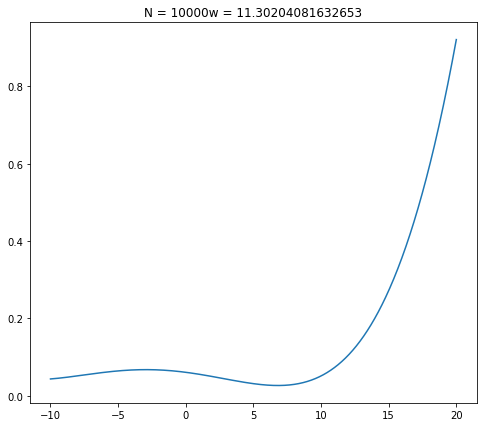

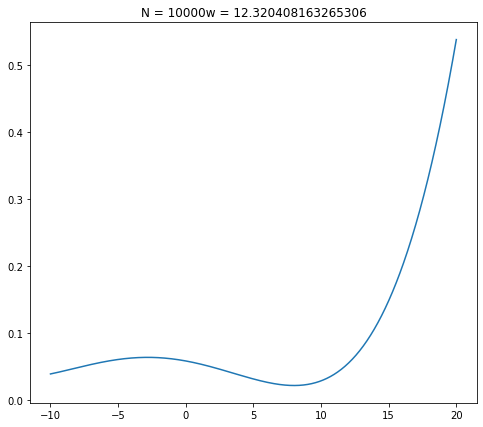

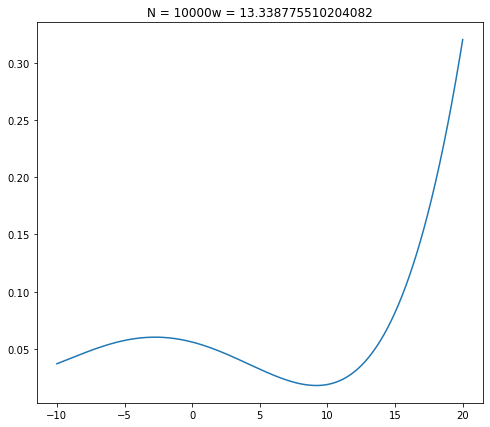

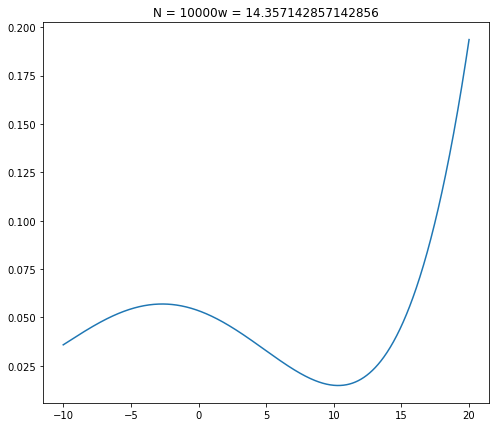

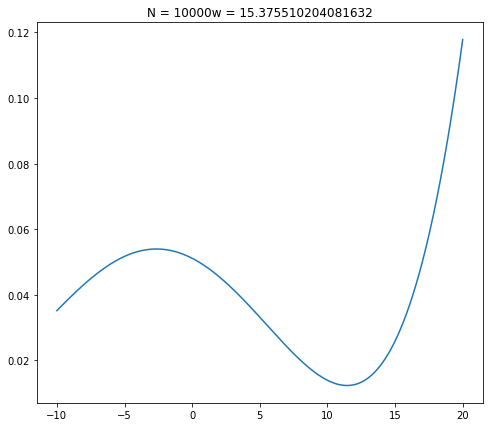

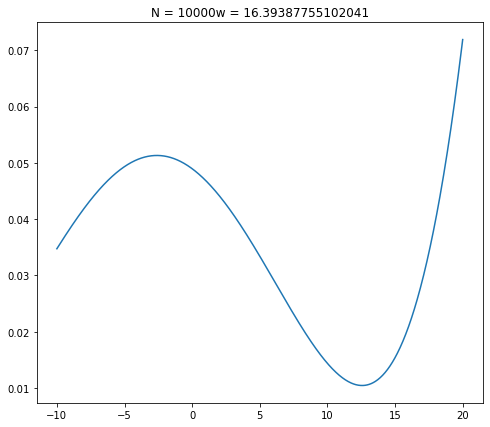

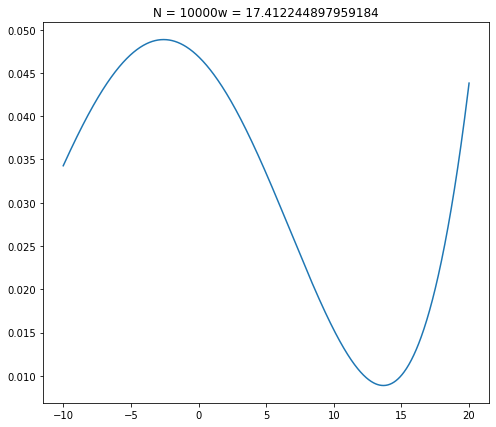

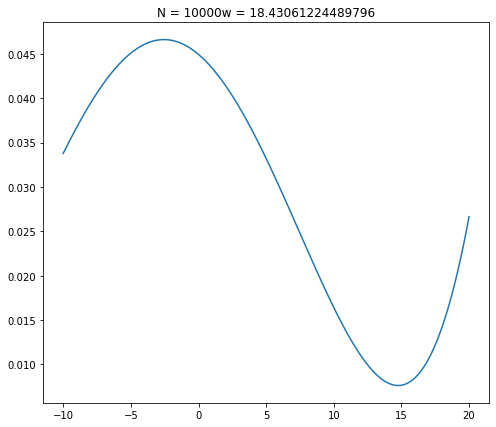

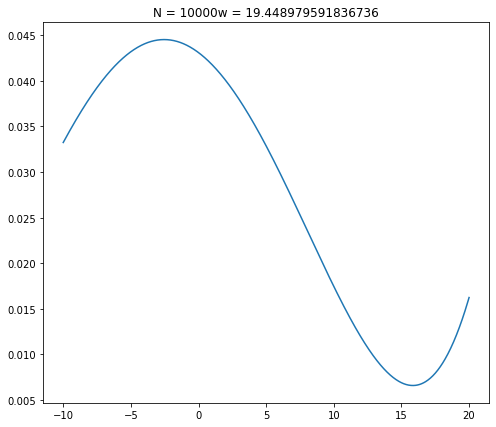

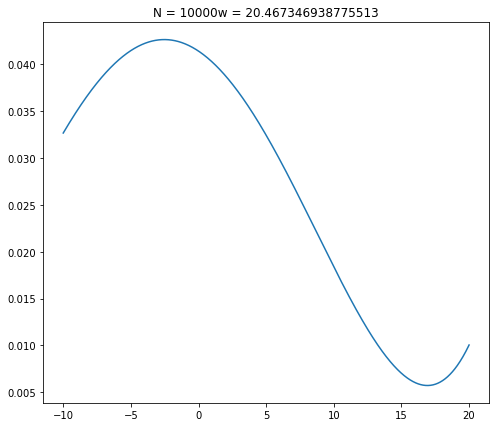

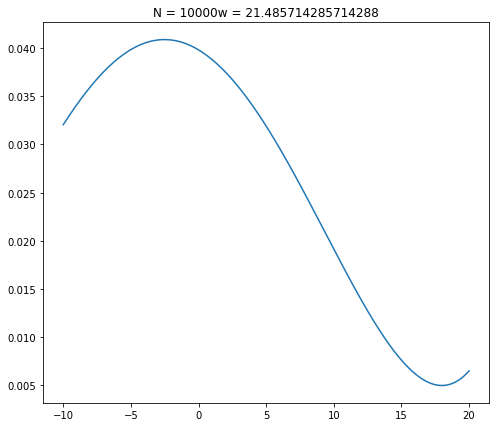

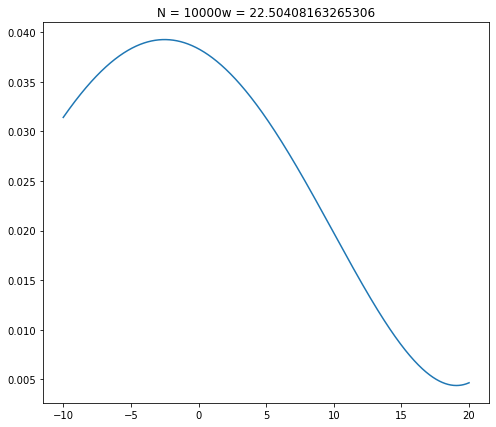

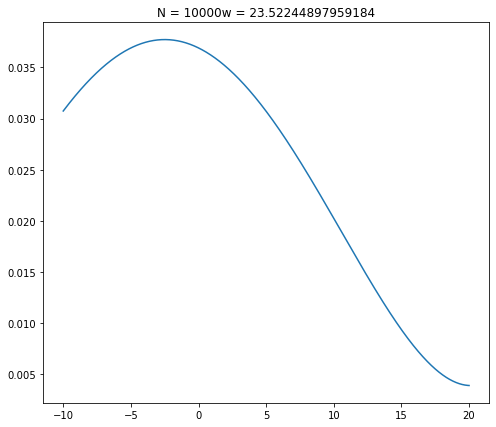

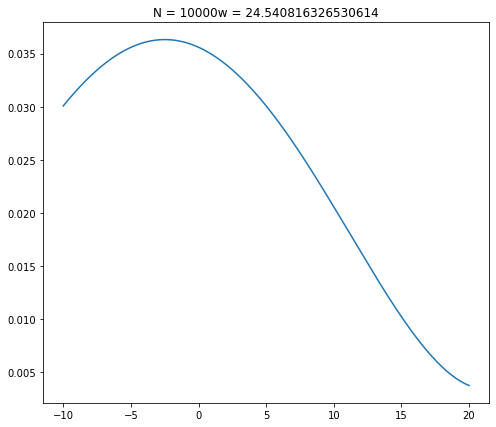

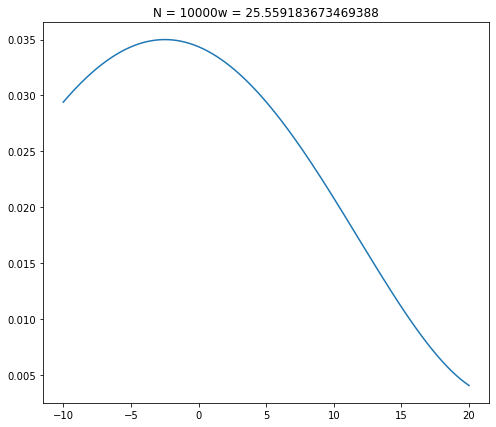

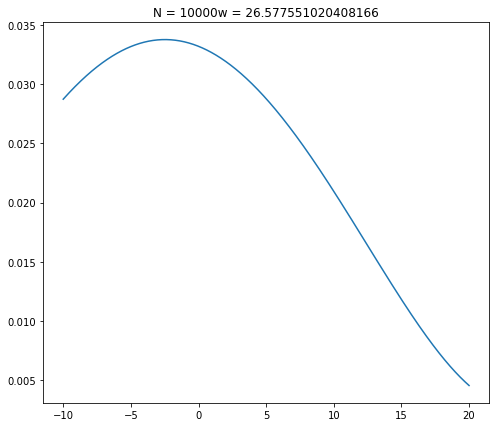

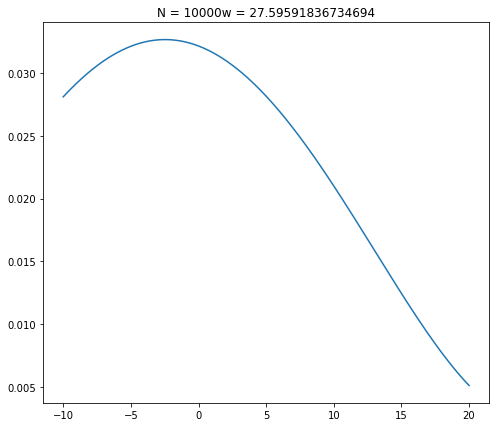

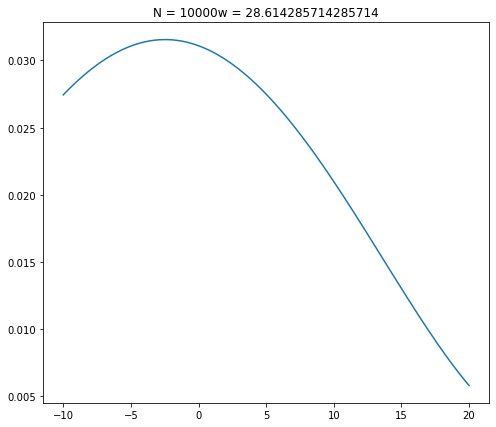

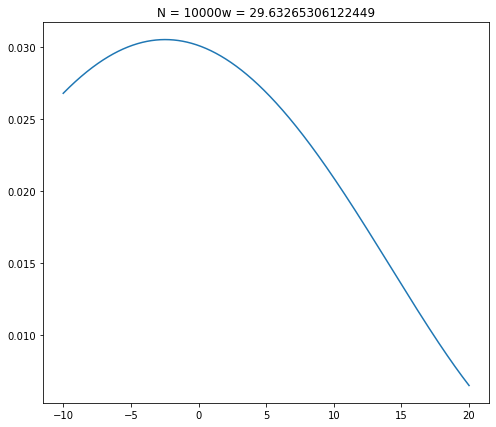

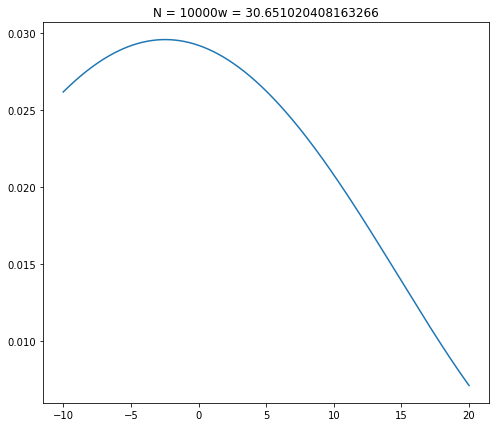

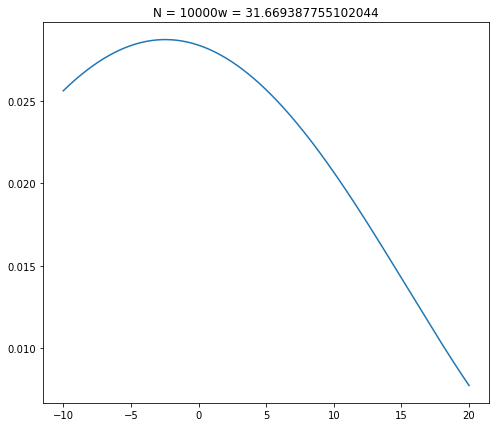

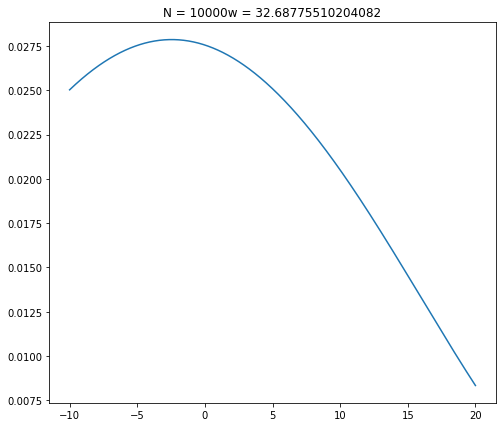

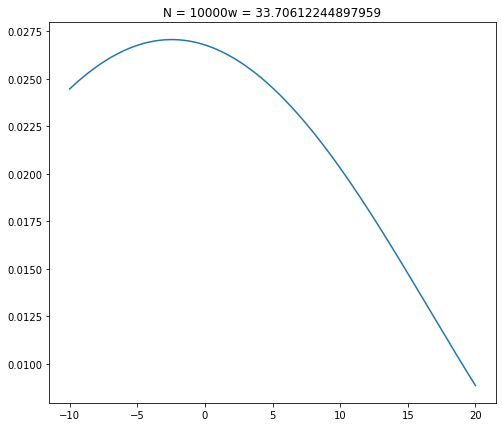

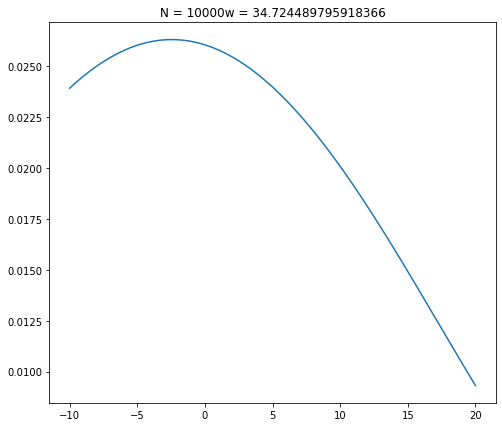

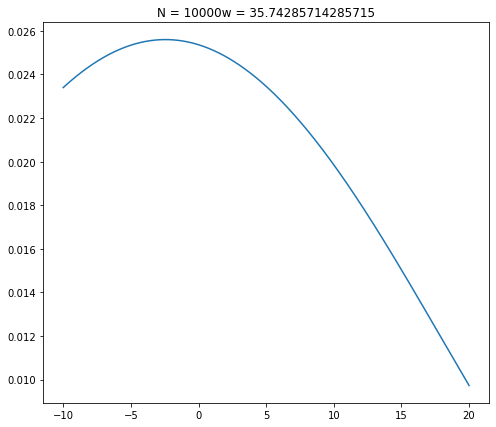

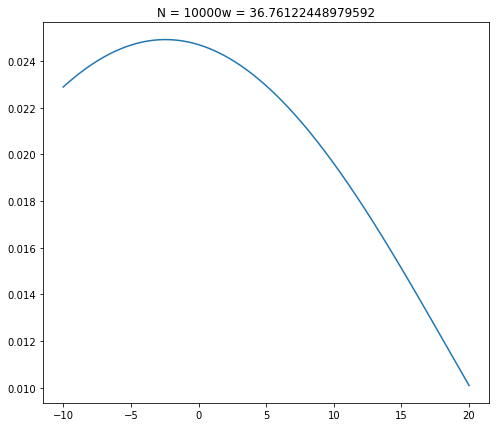

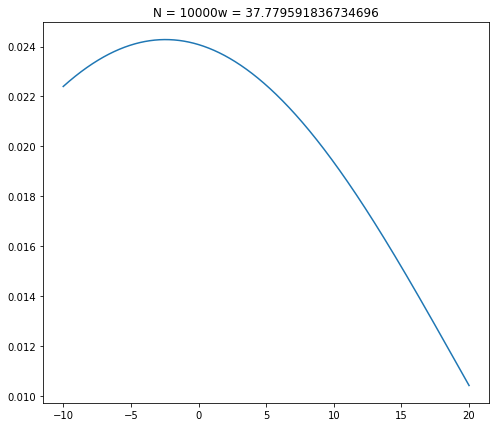

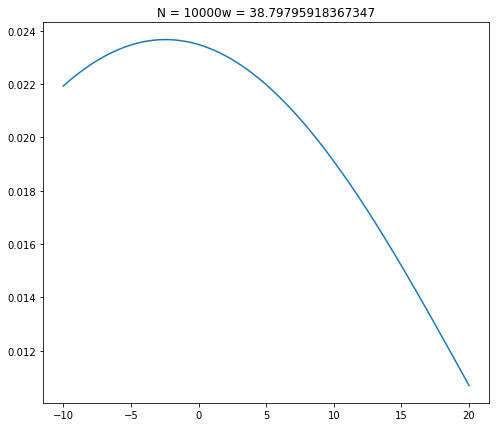

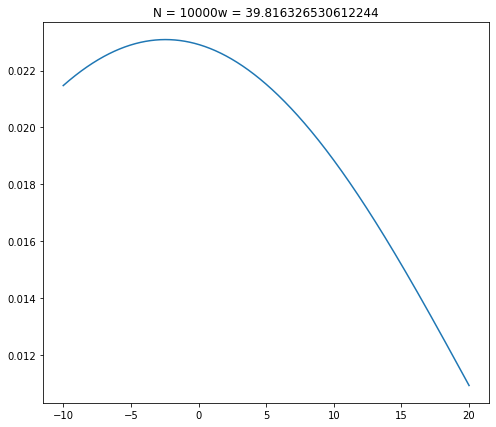

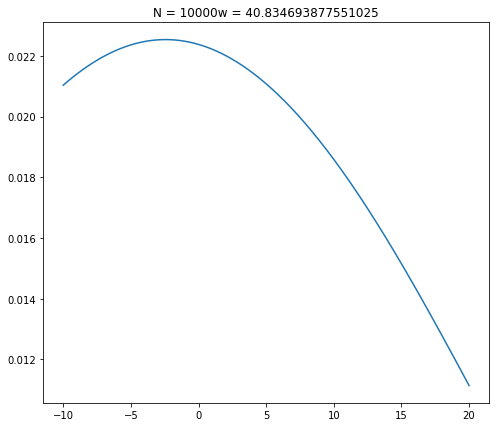

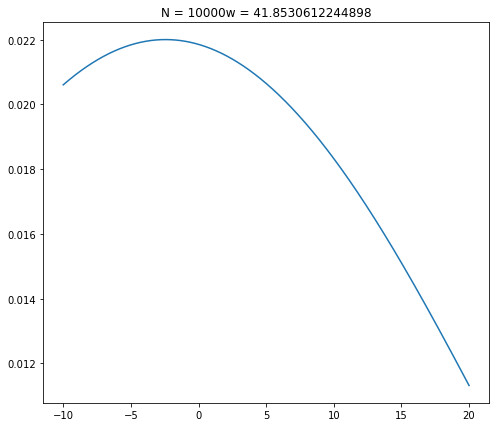

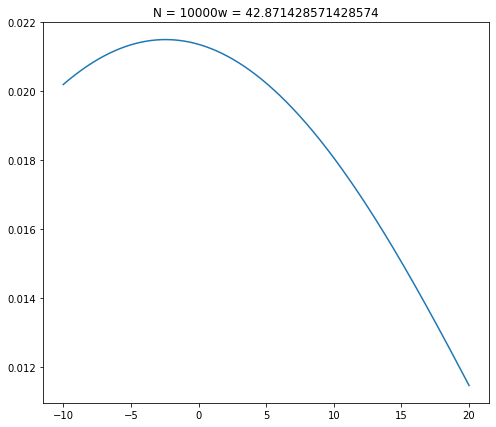

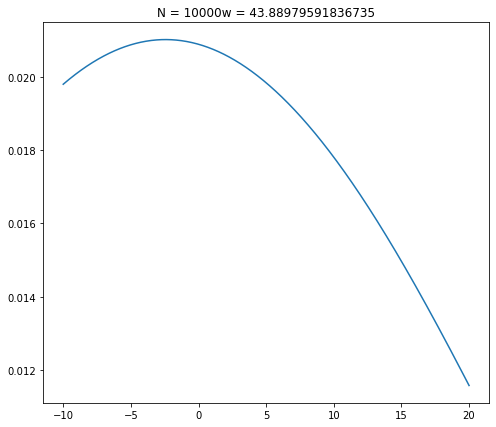

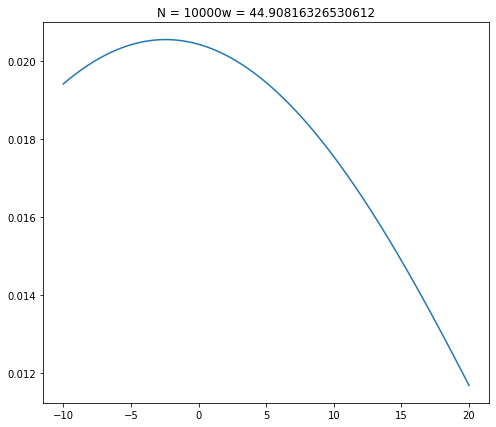

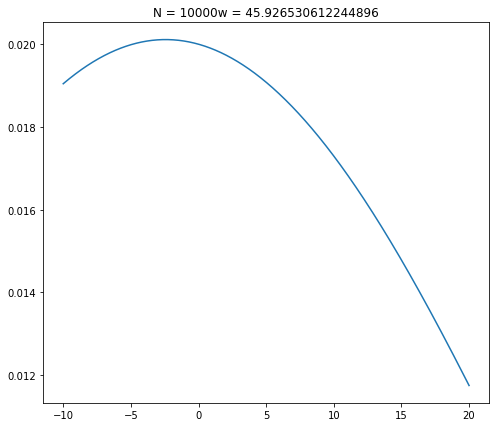

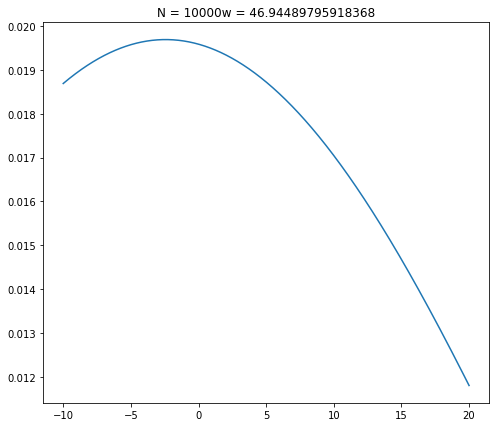

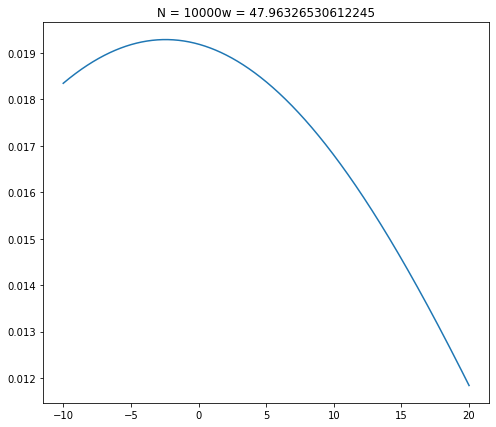

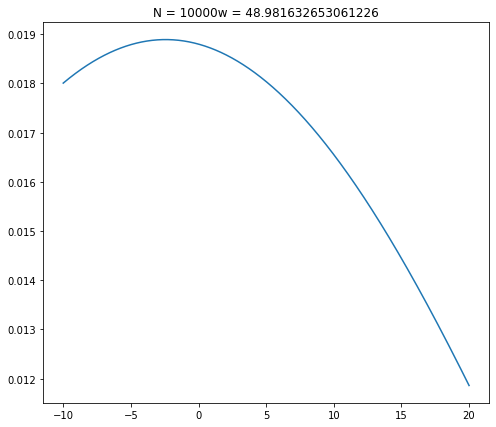

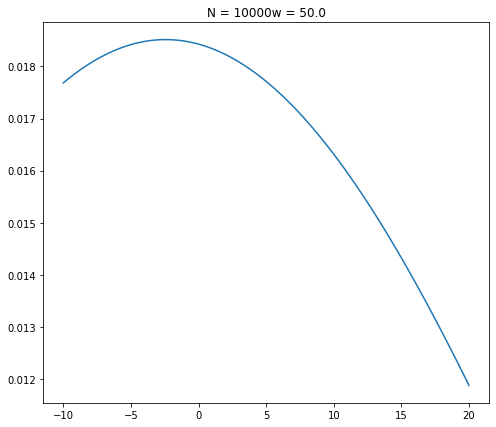

In [13]:

N = 10000
data_N = data[:N]

X = np.linspace(-10,20,1000)   ##defining the new range
def kde(x, obs, w):
    # TODO: implement the KDE with the biweight kernel

    N = int(len(obs))  ##numbers of sampled data
    estimator  = 0 ##initializing estimator with zero value
    for i in obs:
        estimator += biweight(X,i,w)
    estimator  = estimator/(N)    
    return estimator



for j in bandwidth_array:
    K  = kde(X,data_N,j)
    plt.figure(figsize = (8,7))
    plt.title("N = " +str(N)+"w = "+str(j))

    plt.plot(X,K)
    plt.show()



## 3 Mean-Shift
(b) Bonus

In [ ]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: compute a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    
    # TODO: threshold the distances with r to get an array of masks for every data point
    
    # TODO: compute the number of points in x within radius r of each xt
    
    # TODO: compute the local means by summing over the neighbors of each element in xt 
    #       and dividing by the number of neighbors
    
    return local_means
    

In [ ]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories


In [3]:
# TODO: repeat the above for "blurring" mean shift


## 4 K-Means

(b)

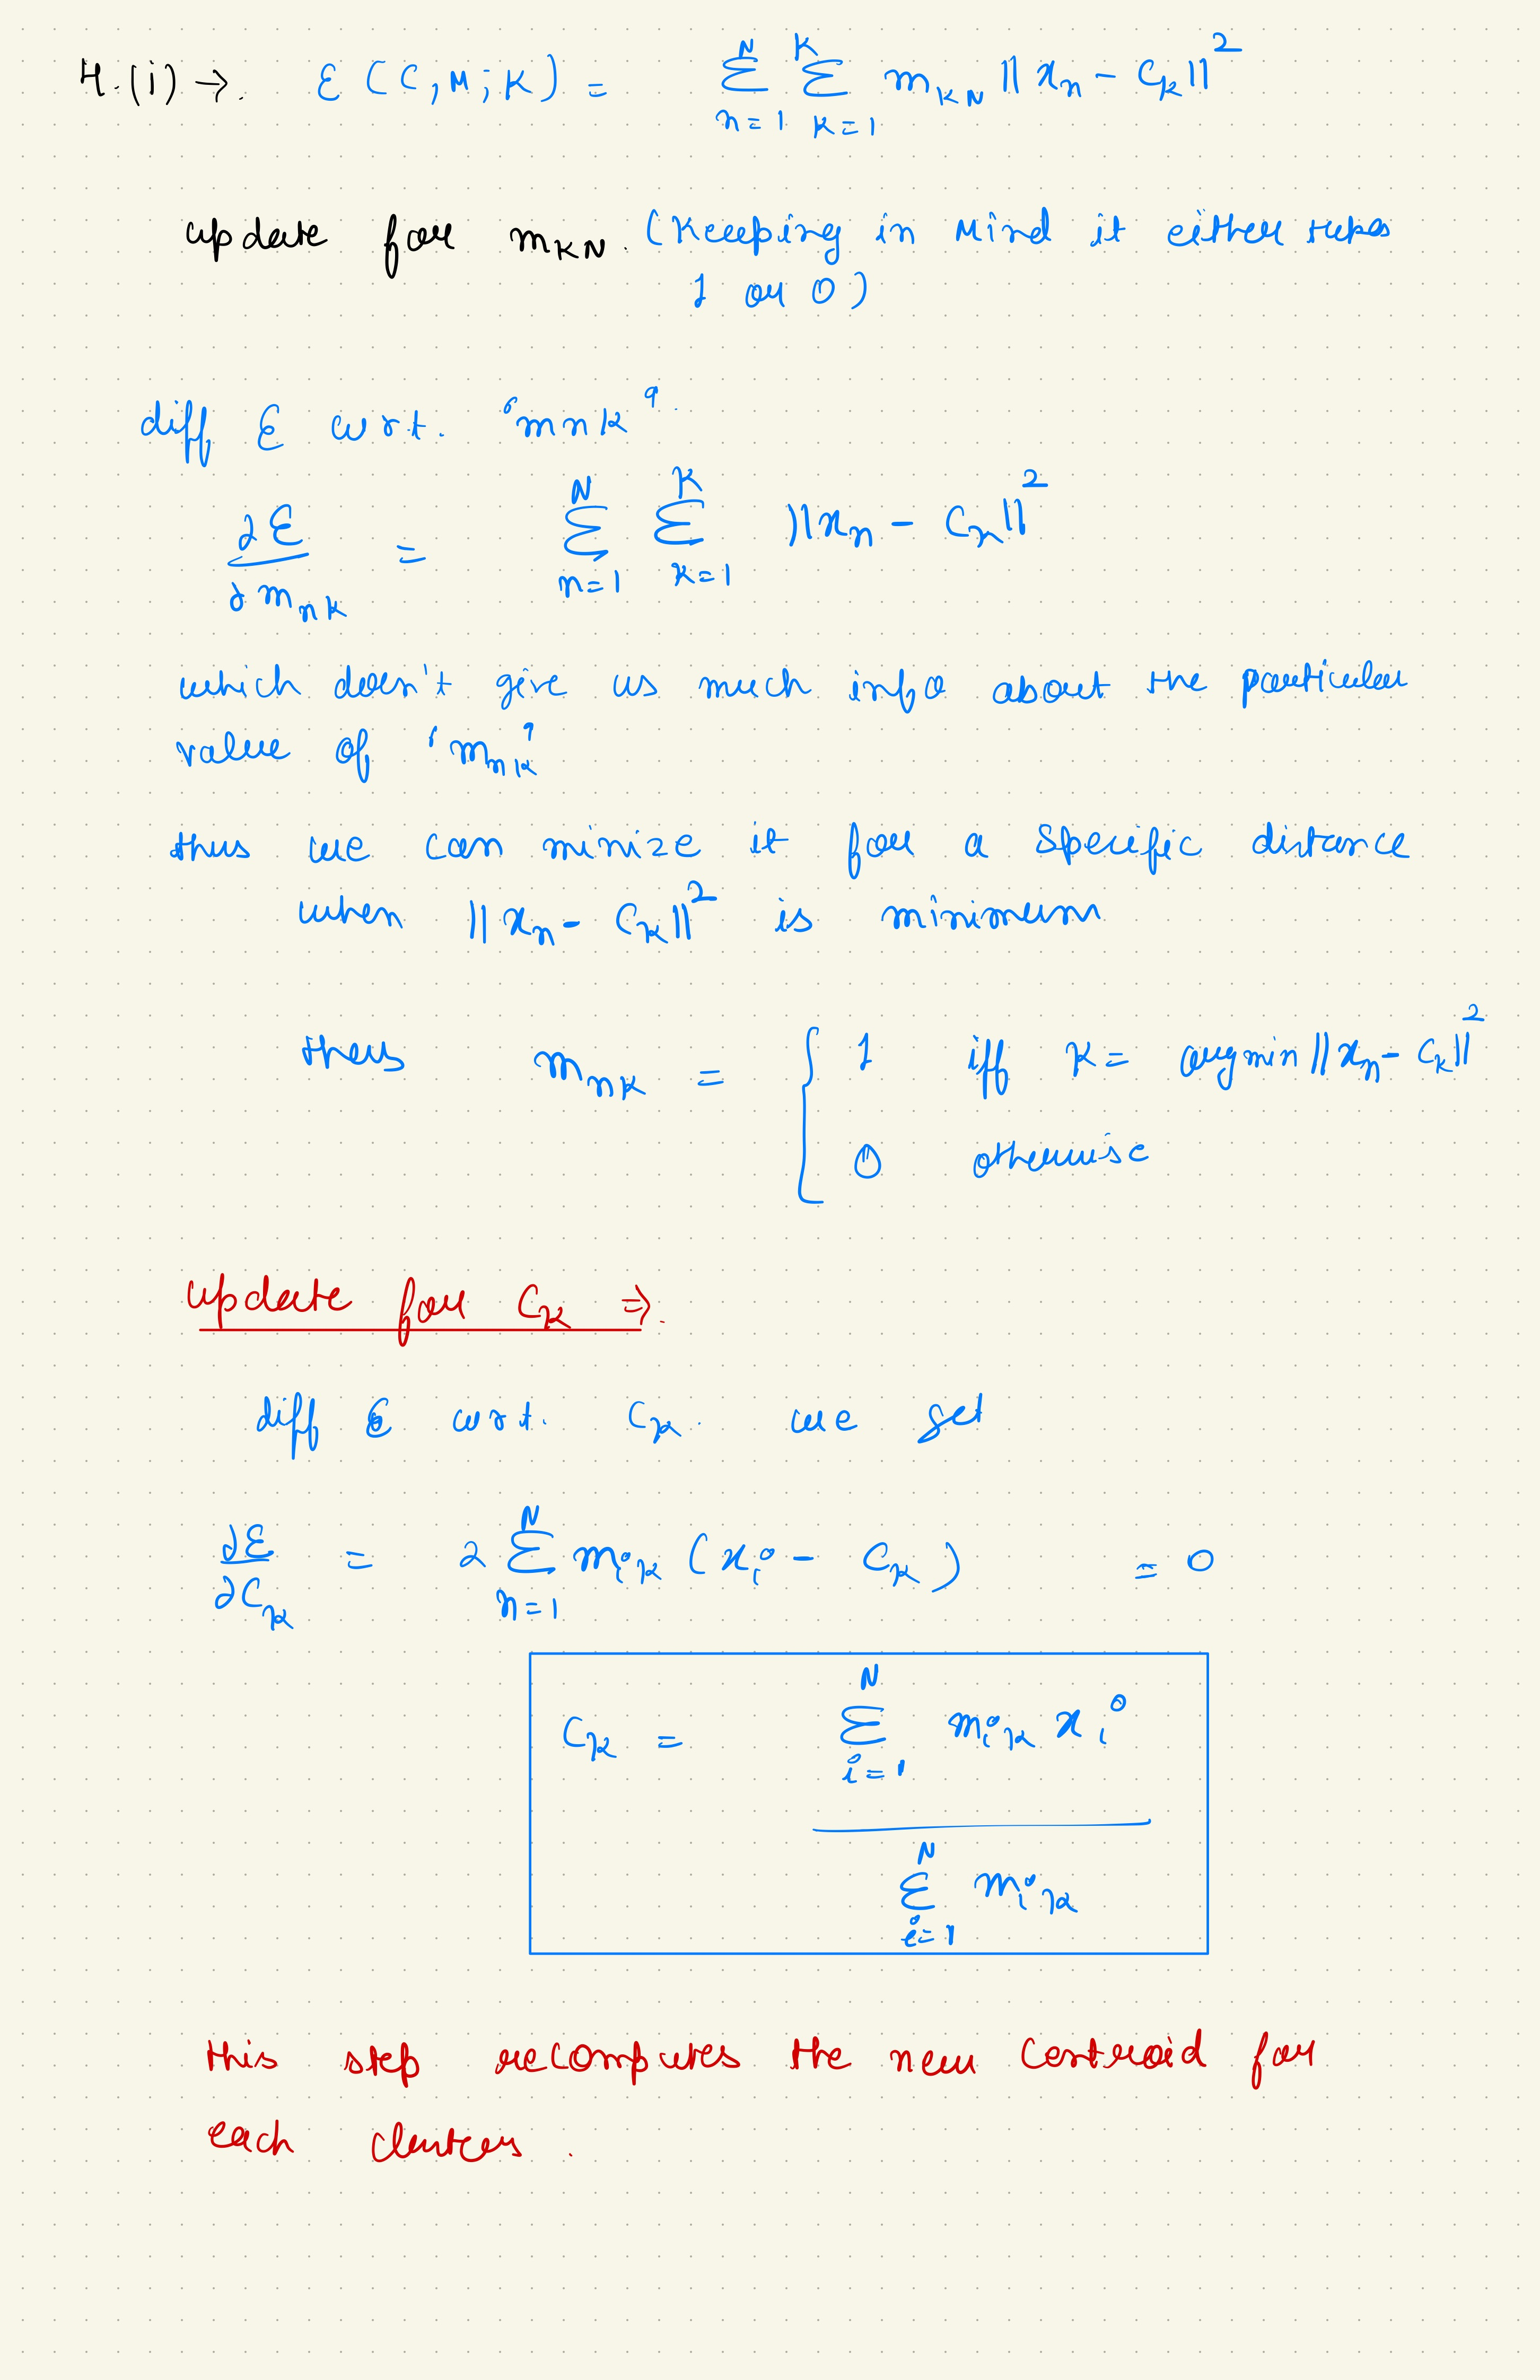

In [4]:
from IPython.display import Image
Image(filename='4a.jpg') 

In [17]:
from sklearn.cluster import KMeans
import numpy as np
X = np.random.randint(1,10,(15,50))

print(X.shape)
kmeans = KMeans(n_clusters=10,n_init = 1,max_iter = 1, random_state=0)



(15, 50)


In [23]:
from sklearn.cluster import KMeans

def kmeans_step(x, k, c=None, init='random'):
    """
    K-Means clustering on a p x N data matrix.
    
    Parameters
    ----------
    x : np.ndarray
        Data matrix of shape (p, N).
    k : int
        Number of cluster.
    c : np.ndarray, optional
        Current cluster centers. If None, the initialization as specified by 'init' will be used.
    init: str
        The initialization method to be used if c is None.
        
    Returns
    -------
    float, np.ndarray
        cost after the step, updated cluster centers
    """
    
    if c is not None: 
        assert c.shape[0] == k  ##i changed becuase if it is passed as init then it must have shape(n_cluster,n_fetaure)
        
        
    if c is None:
        init = init;
    else: init = c    
  
    # Note: the documentation is your friend: 
    #       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
    # TODO: set n_cluster, init, n_init and max_iter appropriately
    single_step_kmeans = KMeans(
        n_clusters=k, 
        init=init, 
        max_iter=1,
        n_init=1,
    )
    
    # TODO call the single_step_kmeans
    ssk =single_step_kmeans.fit(x.T)
    
    # TODO get the current energy (you don't have to compute it - it's stored in single_step_kmeans)
    E = ssk.inertia_
    # TODO read out cluster centers 
    C =ssk.cluster_centers_
    
    return E, C
    

In [24]:
# load the data (you can try both with the full normalized feature and the 2d umap projection)

features = np.load('data/dijet_features_normalized.npy')  # full features
# features = np.load('data/dijet_features_umap.npy')      # umap projection

print(f'{features.shape=}')



features.shape=(116, 2233)


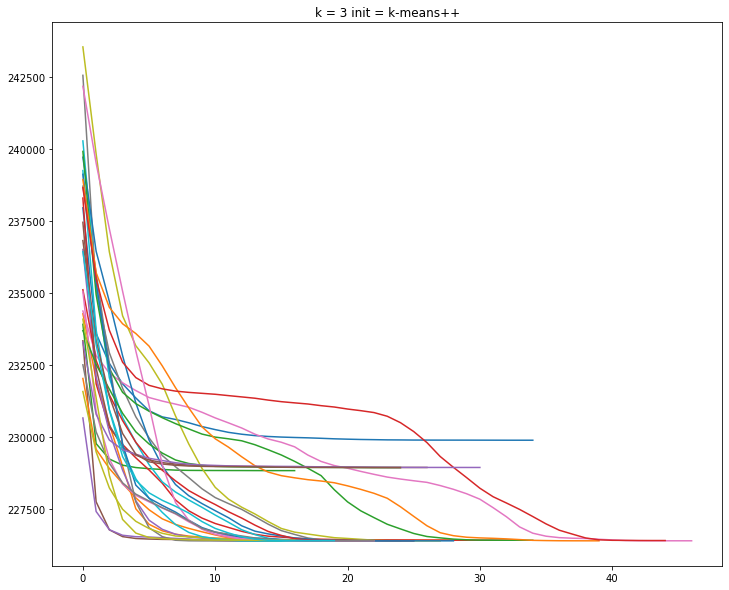

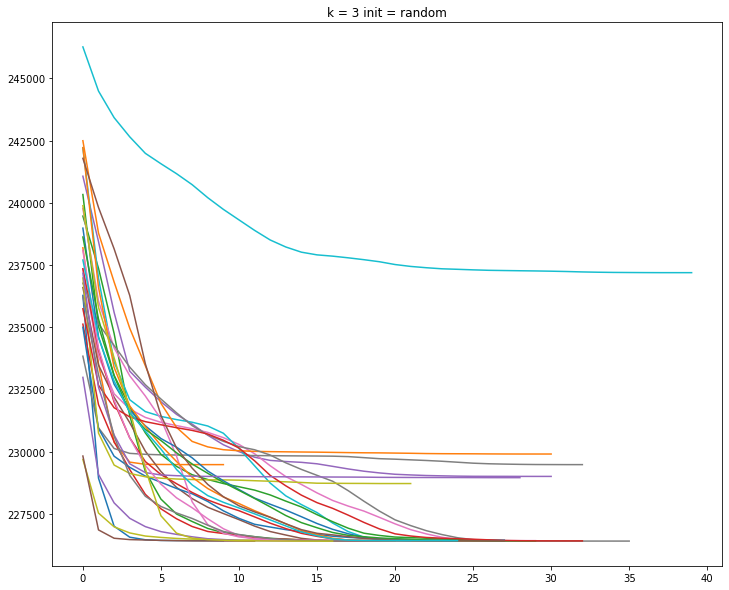

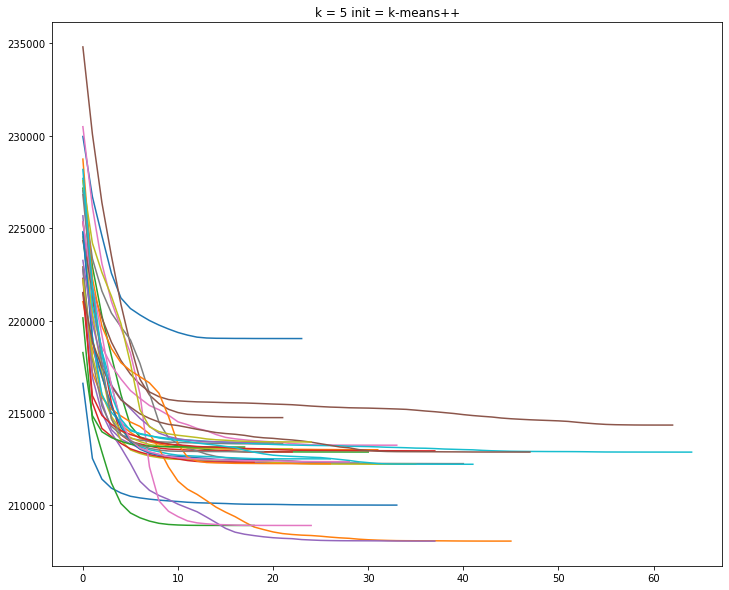

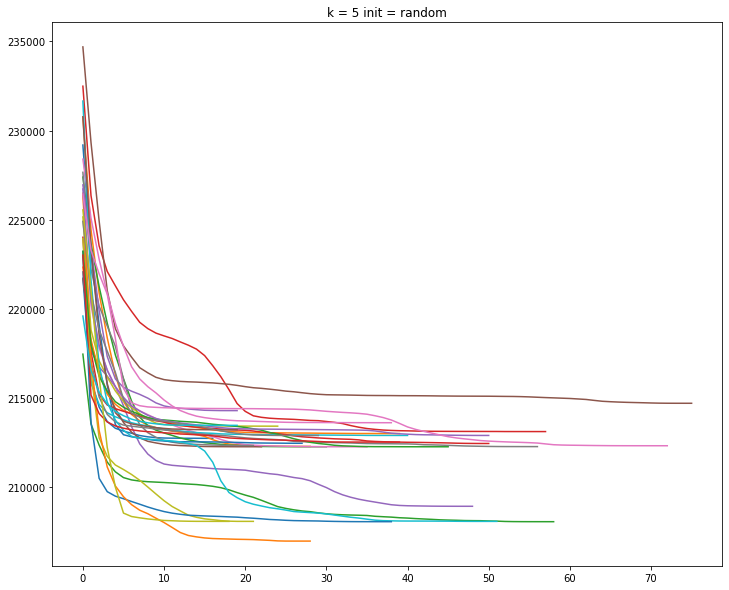

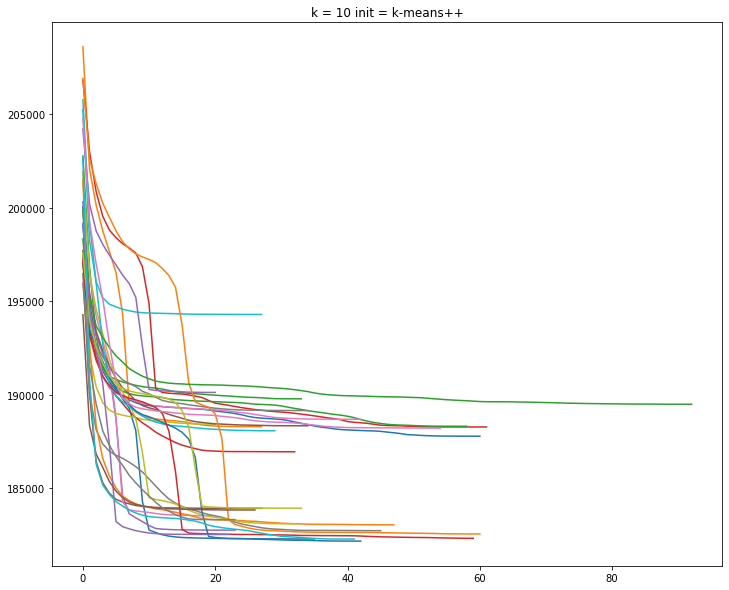

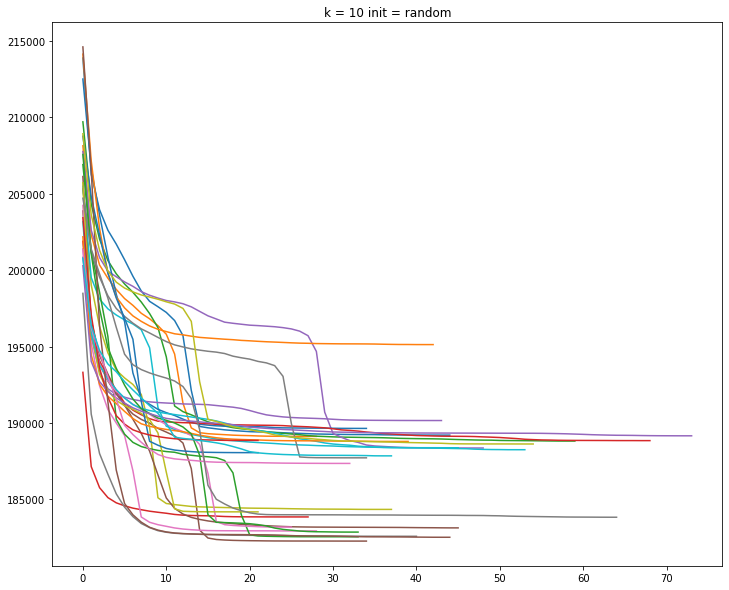

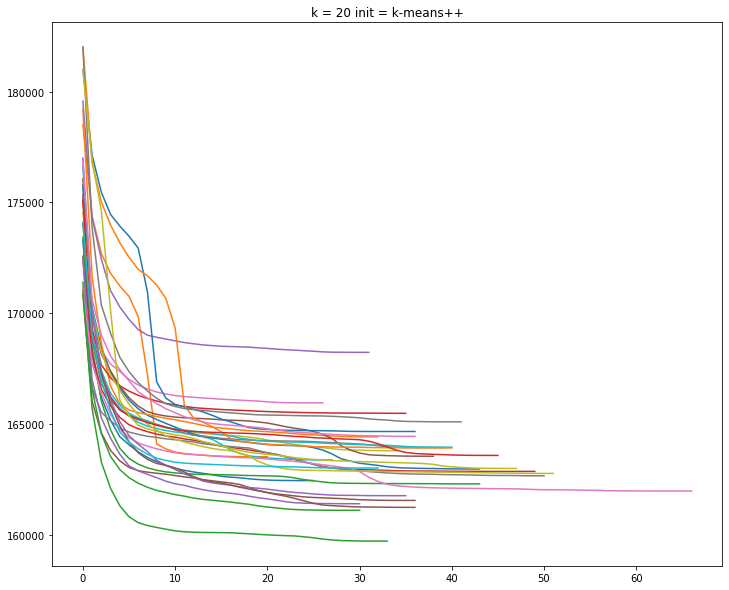

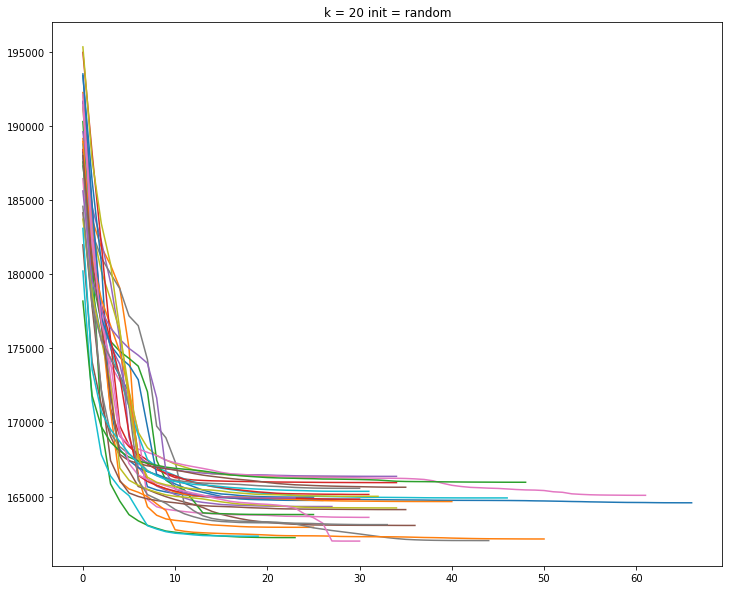

In [27]:
import warnings
warnings.filterwarnings('ignore')

def kmeans(x, k, max_steps=100, init='random'):
    c = None
    energies = []  # list of energies over the iterations. 
    for i in range(max_steps):
        # Call the kmeans_step implemented above to get the energy and the next cluster centers
        E, C = kmeans_step(x, k=k, c=c, init=init)
        energies.append(E)
        c = C  ##changeing the cluster array after each step
       
        
        # Stop the loop if there was no improvement
        if i>=2 and energies[-1] == energies[-2]:
            break
    energies = np.array(energies)
    return energies  # return array of energies

for k in [3, 5, 10, 20]:
    for init in ['k-means++', 'random']:
        # TODO: for the given k and init, run k-means 20 times or more (using the kmeans function above)
        #       and plot the resulting energy trajectories

        plt.figure(figsize = (12,10))
        plt.title("k = "+str(k) + " init = "+ init) 
        for i in range(30):
            energy_arr = kmeans(features,k,max_steps = 100,init = init)
            plt.plot(np.arange(0,len(energy_arr)),energy_arr)
        plt.show()    
